<a href="https://colab.research.google.com/github/ViniciusKanh/TrafficSigns-SafeRouteAI/blob/main/TrafficSigns_SafeRouteAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

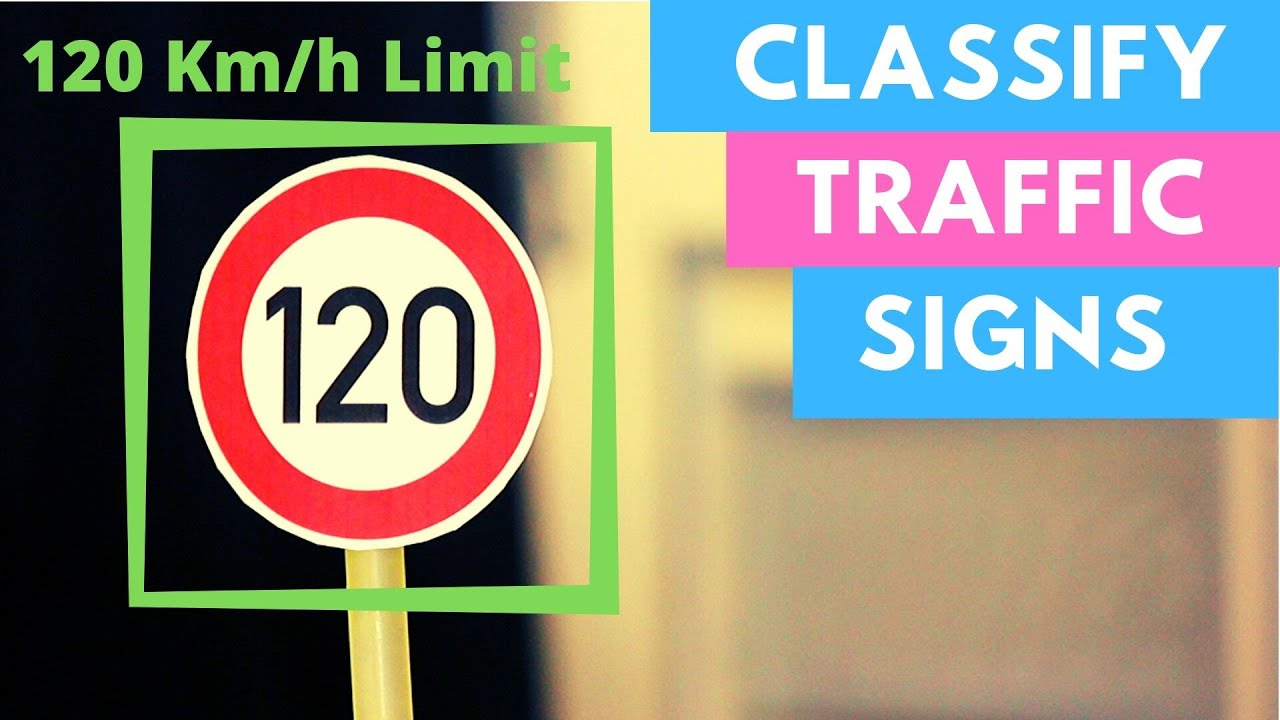
# TrafficSigns-SafeRoute: IA para Detecção de Placa de Trânsito

# Projeto de Pesquisa: SafeRoute - IA para Detecção de Placas de Trânsito

## Introdução

Este projeto se concentra no desenvolvimento de um sistema de IA para a detecção e classificação automatizada de placas de trânsito. Ele se baseia na aplicação de técnicas avançadas de aprendizado de máquina, especificamente redes neurais profundas, para processar e interpretar imagens de placas de trânsito em diferentes condições.

## Justificativa

O reconhecimento preciso de placas de trânsito é essencial para a segurança e eficiência dos sistemas de transporte modernos, especialmente em veículos autônomos e assistidos. Este projeto visa contribuir para este campo, oferecendo um modelo confiável que pode ser integrado a sistemas de assistência ao motorista e veículos autônomos.

## Materiais e Métodos

### Base de Dados

- **Dataset**: GTSRB - German Traffic Sign Recognition Benchmark.
- **Características**: Mais de 50.000 imagens em mais de 40 classes.
- **Fonte**: Disponível publicamente no Kaggle.

### Ambiente de Desenvolvimento

- **Plataforma**: Google Colab, aproveitando sua capacidade de processamento e facilidade de uso.

### Tecnologias e Bibliotecas Utilizadas

- **TensorFlow e Keras**: Para construir e treinar o modelo de rede neural.
- **Pandas**: Para manipulação e análise de dados.
- **Matplotlib e Seaborn**: Para visualização de dados e gráficos.
- **NumPy**: Para operações matemáticas e manipulação de arrays.
- **Skimage**: Para técnicas avançadas de processamento de imagem.
- **Scikit-learn**: Para métricas de avaliação do modelo e divisão do conjunto de dados.

### Metodologia

1. **Pré-Processamento de Dados**:
   - Redimensionamento e normalização das imagens.
   - Implementação de técnicas de data augmentation para aumentar a diversidade do conjunto de dados.

2. **Construção do Modelo**:
   - Utilização de uma arquitetura de rede neural convolucional (CNN) para o processamento eficaz de imagens.
   - Camadas de Batch Normalization para melhorar a estabilidade e desempenho da rede.
   - Uso de camadas de Dropout para reduzir o overfitting.

3. **Treinamento e Validação**:
   - Divisão dos dados em conjuntos de treinamento e validação.
   - Treinamento do modelo usando o otimizador Adam para uma convergência eficiente.
   - Avaliação do desempenho do modelo usando métricas como acurácia e a matriz de confusão.

4. **Gerenciamento de Memória**:
   - Utilização de técnicas para liberação de memória (garbage collection) para otimizar o uso de recursos.

## Resultados Esperados

Espera-se que o modelo seja capaz de identificar e classificar com precisão uma ampla gama de sinais de trânsito. O modelo deve ser robusto contra variações de iluminação, ângulos de visão e distorções.

## Conclusão

O projeto SafeRoute representa uma contribuição significativa para a área de sistemas de transporte inteligente, abordando o desafio de reconhecimento automático de placas de trânsito com uma solução baseada em IA. Este modelo tem o potencial de melhorar a segurança e eficiência no trânsito, especialmente em sistemas de veículos autônomos e assistidos.


# **SafeRoute como um Projeto de Inteligência Artificial**

## Definição Técnica de Inteligência Artificial

A Inteligência Artificial (IA) é um campo da ciência da computação que visa criar sistemas capazes de realizar tarefas que normalmente requerem inteligência humana. Isso inclui aprendizado, raciocínio, percepção, compreensão da linguagem natural e manipulação de objetos. A IA pode ser classificada em aprendizado de máquina, aprendizado profundo, processamento de linguagem natural, visão computacional, entre outros.

## Características da IA no Projeto SafeRoute

### Aprendizado de Máquina e Redes Neurais

O projeto SafeRoute utiliza redes neurais convolucionais (CNNs), uma classe de redes neurais profundas, que são um pilar central da IA moderna. As CNNs são especialmente adequadas para análise e interpretação de dados visuais, como imagens de placas de trânsito.

### Processamento e Análise de Imagens

O processamento de imagens, uma faceta importante da visão computacional, é um dos principais componentes do projeto. O sistema é projetado para interpretar imagens de trânsito, reconhecendo e classificando vários sinais de trânsito. Isso envolve detectar padrões visuais complexos e interpretá-los de maneira semelhante à percepção humana.

### Reconhecimento de Padrões

A capacidade do sistema de distinguir entre diferentes tipos de placas de trânsito é um exemplo claro de reconhecimento de padrões. Esta habilidade é um aspecto fundamental da IA, onde o sistema aprende a identificar e classificar padrões em dados, neste caso, imagens de sinais de trânsito.

### Aplicação Prática de IA

SafeRoute aplica conceitos de IA para resolver um problema prático: melhorar a segurança no trânsito e auxiliar sistemas de navegação autônoma. Isso demonstra a aplicabilidade da IA em cenários reais, indo além de teorias e experimentos em laboratório.

## Metodologias de IA Utilizadas

- **Aprendizado Supervisionado**: O modelo é treinado com um conjunto de dados rotulado, permitindo que aprenda a relação entre as imagens das placas de trânsito e suas respectivas classificações.
- **Data Augmentation**: Esta técnica melhora a generalização do modelo, um conceito chave no aprendizado de máquina, ao aumentar a diversidade dos dados de treinamento.
- **Otimização e Ajuste de Modelo**: O uso do otimizador Adam e técnicas como Batch Normalization e Dropout demonstra a aplicação de métodos avançados de otimização em IA.

## Conclusão

O projeto SafeRoute incorpora elementos fundamentais da IA, como redes neurais profundas, processamento de imagens e reconhecimento de padrões, para resolver um problema específico de classificação de sinais de trânsito. A abordagem adotada é representativa das técnicas atuais em IA, destacando-se pela aplicação prática desses conceitos em um contexto realista e desafiador.


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import math

import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from skimage import exposure
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [18]:
random_state = 3571

np.random.seed(random_state)

## Gerenciamento Eficiente de Memória
Inclua práticas de gerenciamento de memória para evitar o esgotamento da RAM disponível:

In [2]:
import gc

# Função para liberar memória
def free_memory():
    gc.collect()

# Após operações pesadas de processamento ou após carregar grandes datasets
free_memory()

In [3]:
link = '/content/drive/My Drive/0-Dataset/SafeRoute/'

Observando a descrição do dataset, é possível encontrar a relação entre os valores numéricos de ```ClassId``` e as descrições das placas com classificação e tipo de cada placa.

A informação de tipo é importante pois placas de mesmo tipo têm forma similar. Por exemplo, placas do tipo ```prohibitory``` são circulares e com borda vermelha, enquanto placas do tipo ```danger``` são triangulares e também com borda vermelha. Já as placas ```mandatory``` são placas circulares e preenchidas em azul. Por fim, as placas identificada como ```other``` possuem formas distintas.

In [5]:
GTSRBInfo = pd.DataFrame({
    0:  { 'Type': 'prohibitory',  'Label': "limite de velocidade 20" },
    1:  { 'Type': 'prohibitory',  'Label': "limite de velocidade 30" },
    2:  { 'Type': 'prohibitory',  'Label': "limite de velocidade 50" },
    3:  { 'Type': 'prohibitory',  'Label': "limite de velocidade 60" },
    4:  { 'Type': 'prohibitory',  'Label': "limite de velocidade 70" },
    5:  { 'Type': 'prohibitory',  'Label': "limite de velocidade 80" },
    6:  { 'Type': 'other',        'Label': "fim da restrição 80" },
    7:  { 'Type': 'prohibitory',  'Label': "limite de velocidade 100" },
    8:  { 'Type': 'prohibitory',  'Label': "limite de velocidade 120" },
    9:  { 'Type': 'prohibitory',  'Label': "proibido ultrapassar" },
    10: { 'Type': 'prohibitory',  'Label': "proibido ultrapassar (caminhões)" },
    11: { 'Type': 'danger',       'Label': "prioridade na próxima interseção" },
    12: { 'Type': 'other',        'Label': "estrada com prioridade" },
    13: { 'Type': 'other',        'Label': "ceda a passagem" },
    14: { 'Type': 'other',        'Label': "pare" },
    15: { 'Type': 'prohibitory',  'Label': "sem tráfego em ambas as direções" },
    16: { 'Type': 'prohibitory',  'Label': "proibido caminhões" },
    17: { 'Type': 'other',        'Label': "entrada proibida" },
    18: { 'Type': 'danger',       'Label': "perigo" },
    19: { 'Type': 'danger',       'Label': "curva à esquerda" },
    20: { 'Type': 'danger',       'Label': "curva à direita" },
    21: { 'Type': 'danger',       'Label': "curva" },
    22: { 'Type': 'danger',       'Label': "estrada irregular" },
    23: { 'Type': 'danger',       'Label': "estrada escorregadia" },
    24: { 'Type': 'danger',       'Label': "estreitamento da via" },
    25: { 'Type': 'danger',       'Label': "construção" },
    26: { 'Type': 'danger',       'Label': "sinal de trânsito" },
    27: { 'Type': 'danger',       'Label': "travessia de pedestres" },
    28: { 'Type': 'danger',       'Label': "travessia escolar" },
    29: { 'Type': 'danger',       'Label': "travessia de ciclistas" },
    30: { 'Type': 'danger',       'Label': "neve" },
    31: { 'Type': 'danger',       'Label': "animais" },
    32: { 'Type': 'other',        'Label': "fim da restrição" },
    33: { 'Type': 'mandatory',    'Label': "vire à direita" },
    34: { 'Type': 'mandatory',    'Label': "vire à esquerda" },
    35: { 'Type': 'mandatory',    'Label': "siga em frente" },
    36: { 'Type': 'mandatory',    'Label': "vire à direita ou siga em frente" },
    37: { 'Type': 'mandatory',    'Label': "vire à esquerda ou siga em frente" },
    38: { 'Type': 'mandatory',    'Label': "mantenha-se à direita" },
    39: { 'Type': 'mandatory',    'Label': "mantenha-se à esquerda" },
    40: { 'Type': 'mandatory',    'Label': "rotatória"                             },
    41: { 'Type': 'other',        'Label': "fim da restrição (ultrapassagem)"          },
    42: { 'Type': 'other',        'Label': "fim da restrição (ultrapassagem (caminhões))" },
}).T

# Adiciona ClassId como coluna da tabela
GTSRBInfo.index.name = 'ClassId'
GTSRBInfo.reset_index(inplace=True)

# Transforma Label em valor categórico
GTSRBInfo['Label'] = GTSRBInfo.Label.astype('category')

# Transforma Type em valor categórico e ordena de acordo com a quantidade de dados
Types = GTSRBInfo.Type.value_counts().index
GTSRBInfo['Type'] = GTSRBInfo.Type.astype('category').cat.reorder_categories(Types)
GTSRBInfo['TypeId'] = GTSRBInfo.Type.cat.codes

GTSRBInfo

ClassId         Type                                         Label  TypeId
0         0  prohibitory                       limite de velocidade 20       1
1         1  prohibitory                       limite de velocidade 30       1
2         2  prohibitory                       limite de velocidade 50       1
3         3  prohibitory                       limite de velocidade 60       1
4         4  prohibitory                       limite de velocidade 70       1
5         5  prohibitory                       limite de velocidade 80       1
6         6        other                           fim da restrição 80       2
7         7  prohibitory                      limite de velocidade 100       1
8         8  prohibitory                      limite de velocidade 120       1
9         9  prohibitory                          proibido ultrapassar       1
10       10  prohibitory              proibido ultrapassar (caminhões)       1
11       11       danger              prioridade na próxima interseção       0
12       12        other                        estrada com prioridade       2
13       13        other                               ceda a passagem       2
14       14        other                                          pare       2
15       15  prohibitory              sem tráfego em ambas as direções       1
16       16  prohibitory                            proibido caminhões       1
17       17        other                              entrada proibida       2
18       18       danger                                        perigo       0
19       19       danger                              curva à esquerda       0
20       20       danger                               curva à direita       0
21       21       danger                                         curva       0
22       22       danger                             estrada irregular       0
23       23       danger                          estrada escorregadia       0
24       24       danger                          estreitamento da via       0
25       25       danger                                    construção       0
26       26       danger                             sinal de trânsito       0
27       27       danger                        travessia de pedestres       0
28       28       danger                             travessia escolar       0
29       29       danger                        travessia de ciclistas       0
30       30       danger                                          neve       0
31       31       danger                                       animais       0
32       32        other                              fim da restrição       2
33       33    mandatory                                vire à direita       3
34       34    mandatory                               vire à esquerda       3
35       35    mandatory                                siga em frente       3
36       36    mandatory              vire à direita ou siga em frente       3
37       37    mandatory             vire à esquerda ou siga em frente       3
38       38    mandatory                         mantenha-se à direita       3
39       39    mandatory                        mantenha-se à esquerda       3
40       40    mandatory                                     rotatória       3
41       41        other              fim da restrição (ultrapassagem)       2
42       42        other  fim da restrição (ultrapassagem (caminhões))       2

In [6]:
def plotTrafficSigns(dataset, imRead=lambda classe: plt.imread(classe.Path), maxCols=5, random_state=None):
    for Type in Types:
        classes = dataset[dataset.Type == Type]
        classLabels = classes.ClassId.unique()

        nRows = math.ceil(classLabels.size / maxCols)
        nCols = min(classLabels.size, maxCols)

        fig, axs = plt.subplots(
            nrows = nRows,
            ncols = nCols,
            figsize = (4*nCols, 3*nRows + 2),
        )

        for i, pos in enumerate(np.ndindex(axs.shape)):
            try:
                classe = dataset[dataset.ClassId == classLabels[i]].sample(1, random_state=random_state).iloc[0]

                axs[pos].imshow(imRead(classe))
                axs[pos].set_title("{}: {}".format(classe.ClassId, classe.Label))

            except:
                pass

            axs[pos].axis('off')

        fig.suptitle(Type.capitalize(), fontsize='xx-large')
        plt.show()

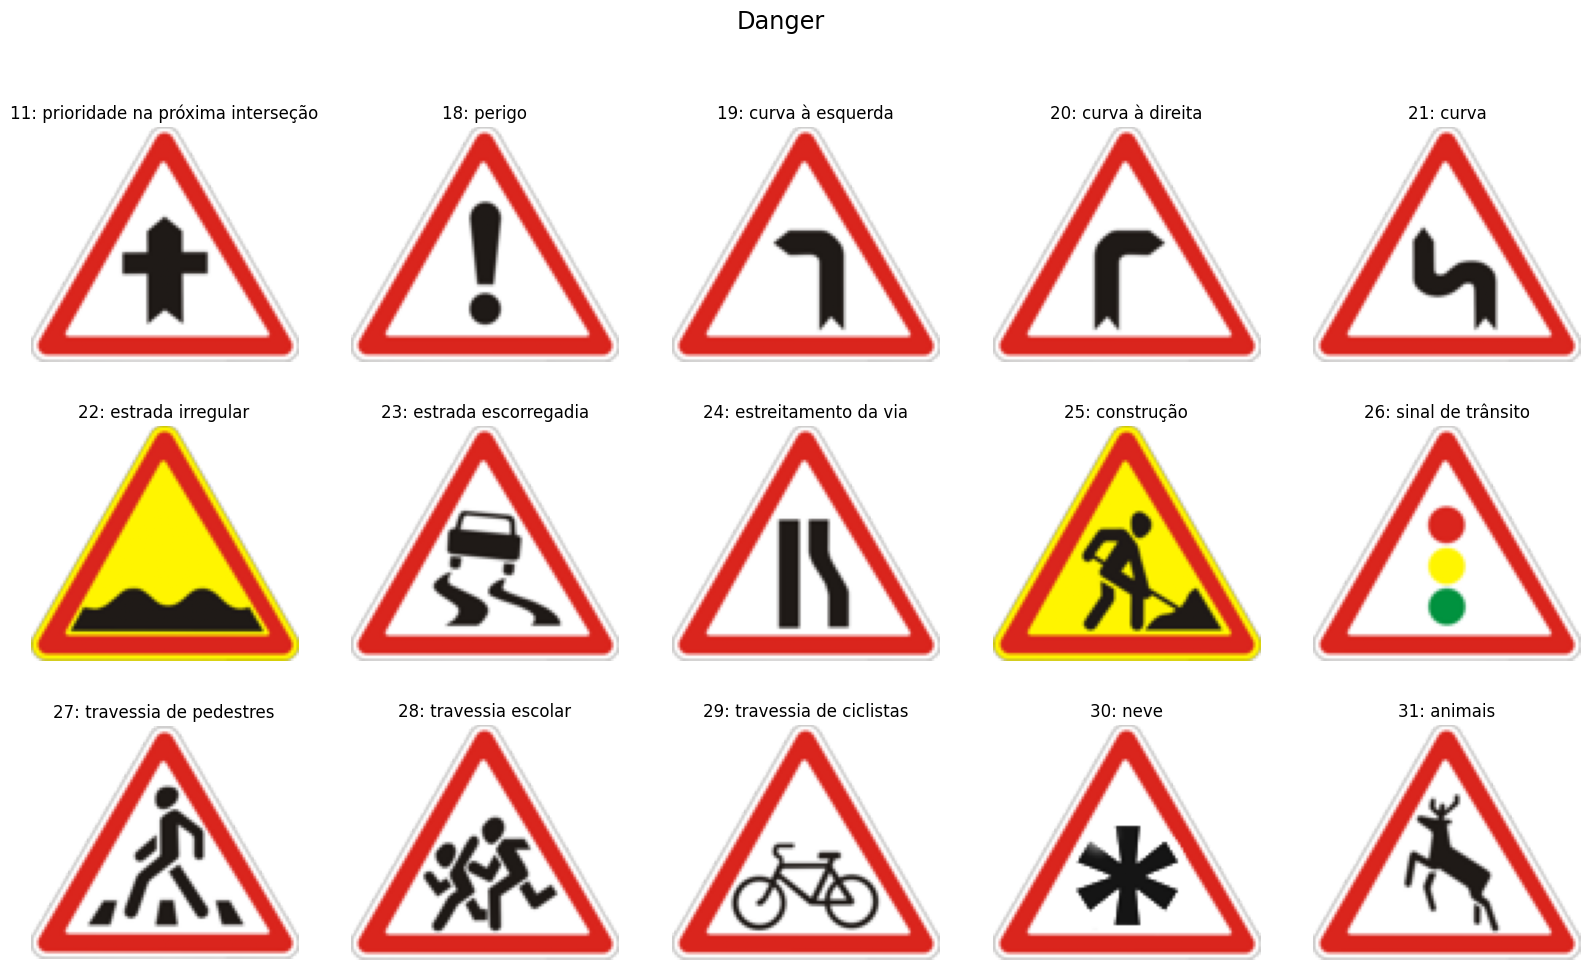

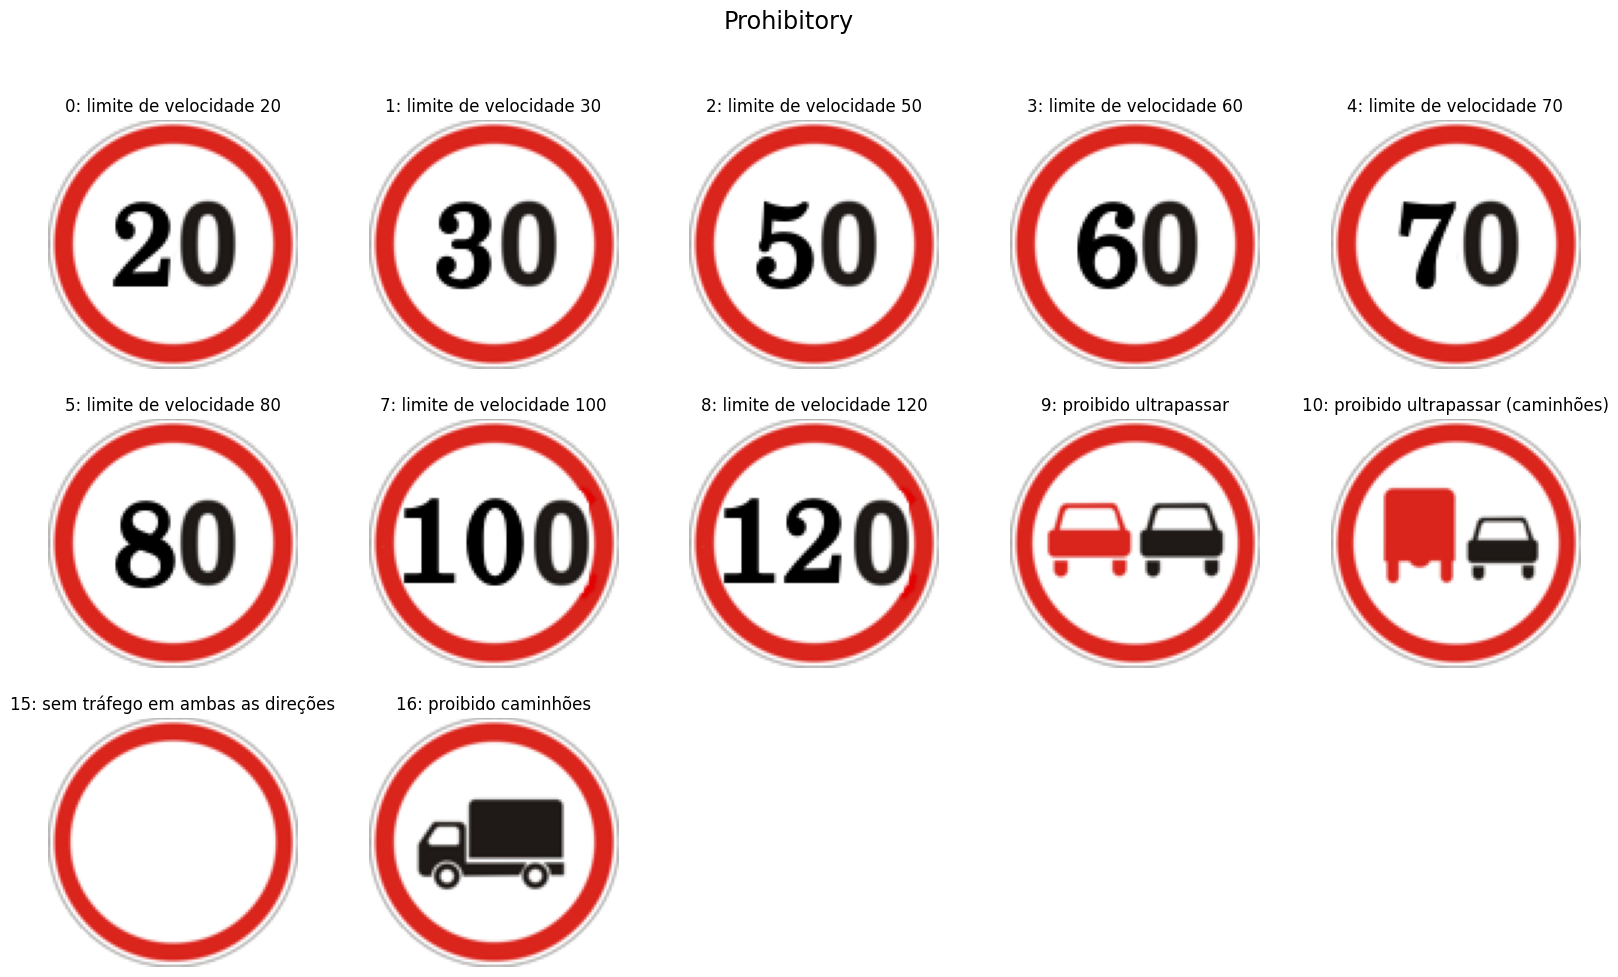

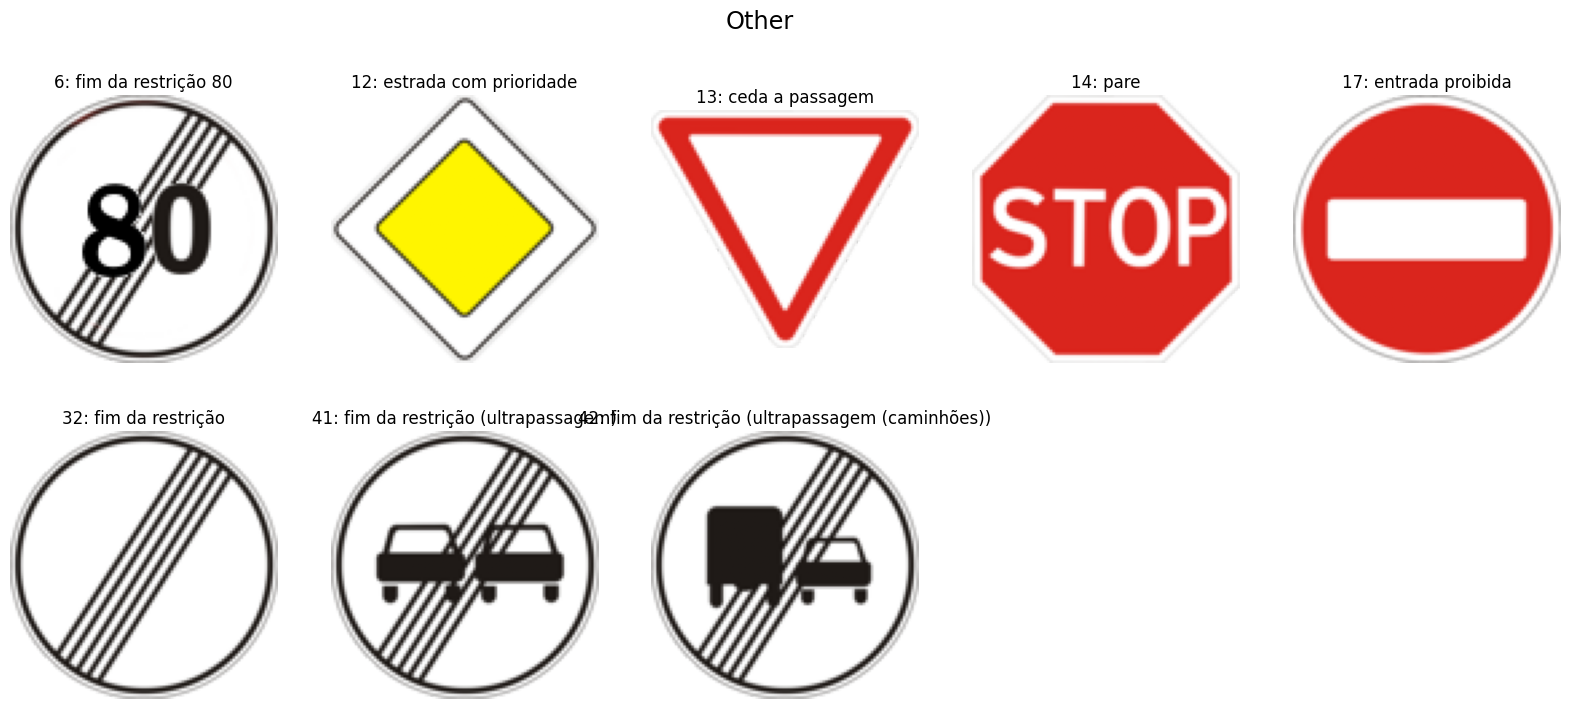

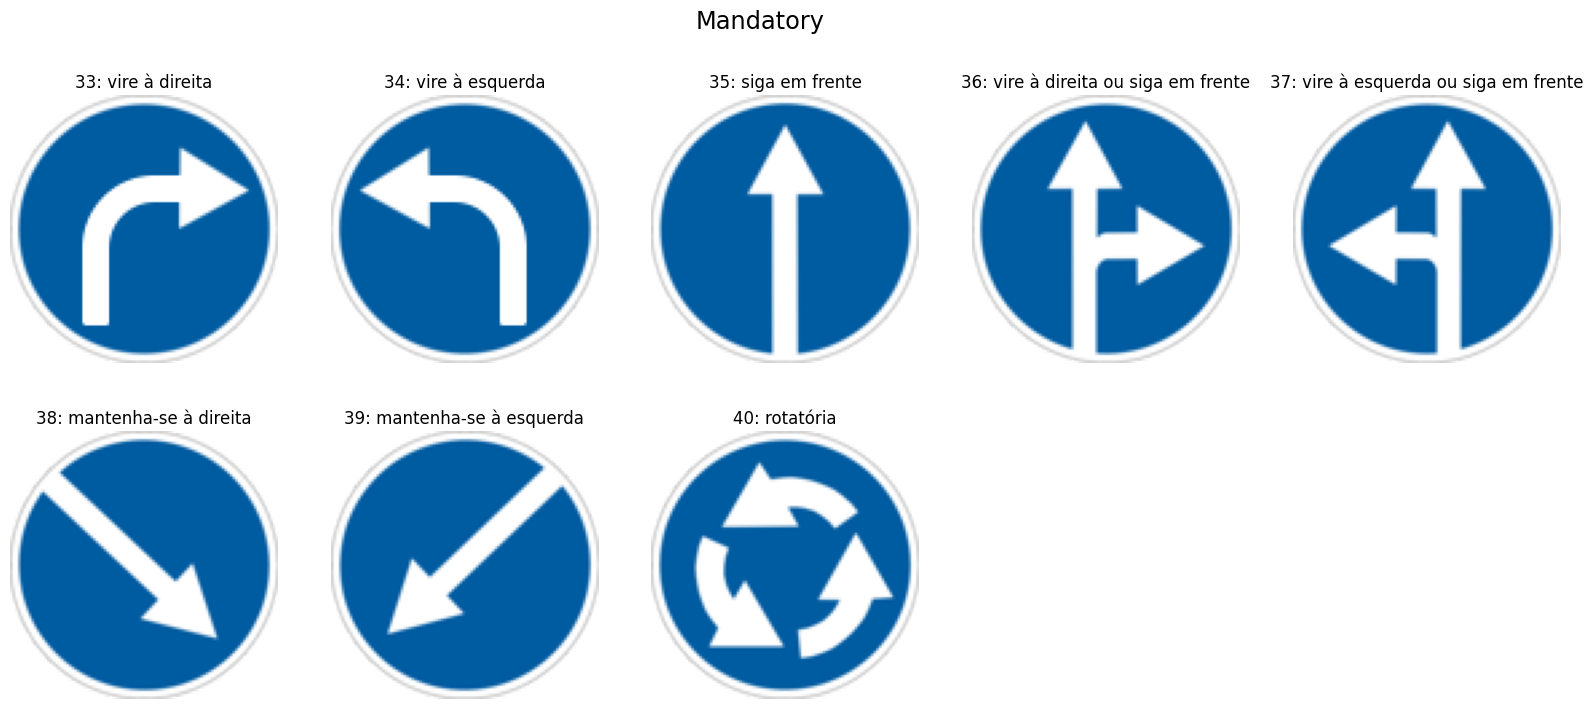

In [7]:
# Apenas no kaggle
metaRead = lambda classe: plt.imread("/content/drive/My Drive/0-Dataset/SafeRoute/Meta/{}.png".format(classe.ClassId))

plotTrafficSigns(dataset=GTSRBInfo, imRead=metaRead)

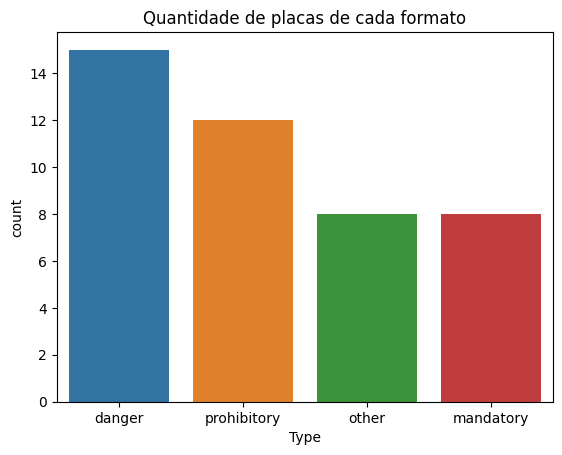

In [8]:
sns.countplot(
    x='Type',
    data=GTSRBInfo,
).set_title('Quantidade de placas de cada formato')

plt.show()

# Carregando o dataset

In [9]:
%%time

# # Concatena os diferentes .csv em um único DataFrame (Apenas local)
# fileName = lambda i: link + "{0:05d}/GT-{0:05d}.csv".format(int(i))
# GTSRB = pd.concat((pd.read_csv(fileName(i), delimiter = ';') for i in GTSRBInfo.ClassId), ignore_index = True)

# # Corrige o caminho das figuras
# GTSRB.Filename = GTSRB.ClassId.map(lambda ID: link + "{:05d}/".format(ID)) + GTSRB.Filename

# Carrega o .csv único disponível (Apenas no Kaggle)
GTSRB = pd.read_csv(link + "Train.csv")
GTSRB.Path = link + GTSRB.Path

# União do dataset e das descrições
GTSRB = GTSRB.merge(GTSRBInfo, on="ClassId")

# Cria lista ordenada das placas disponíveis
Labels = GTSRB.Label.value_counts().index

GTSRB.shape

CPU times: user 61.7 ms, sys: 12.2 ms, total: 73.9 ms
Wall time: 348 ms


(39209, 11)

In [10]:
GTSRB.sample(5)

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
15426     39      39       6       6      34      34       10   
25045     69      68       7       7      63      62       17   
2011      36      35       6       5      31      30        1   
28958     35      35       6       6      30      29       25   
30239    108     104       9      10      99      95       26   

                                                    Path         Type  \
15426  /content/drive/My Drive/0-Dataset/SafeRoute/Tr...  prohibitory   
25045  /content/drive/My Drive/0-Dataset/SafeRoute/Tr...        other   
2011   /content/drive/My Drive/0-Dataset/SafeRoute/Tr...  prohibitory   
28958  /content/drive/My Drive/0-Dataset/SafeRoute/Tr...       danger   
30239  /content/drive/My Drive/0-Dataset/SafeRoute/Tr...       danger   

                                  Label  TypeId  
15426  proibido ultrapassar (caminhões)       1  
25045                  entrada proibida       2  
2011            limite de velocidade 30       1  
28958                        construção       0  
30239                 sinal de trânsito       0

# Análise dos dados


## Informações sobre as figuras

Inicialmente, vamos observar dados relativos aos valores de Height e Width das figuras disponíveis. Aqui pode-se notar que as figuras não são necessariamente quadradas e que possuem tamanhos distintos, variando, em cada eixo, de 25 pixels a até mais de 200 pixels.

In [11]:
GTSRB[['Width', 'Height']].describe()


Width        Height
count  39209.000000  39209.000000
mean      50.835880     50.328930
std       24.306933     23.115423
min       25.000000     25.000000
25%       35.000000     35.000000
50%       43.000000     43.000000
75%       58.000000     58.000000
max      243.000000    225.000000

<ipython-input-12-268f2a9b4108>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
<ipython-input-12-268f2a9b4108>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


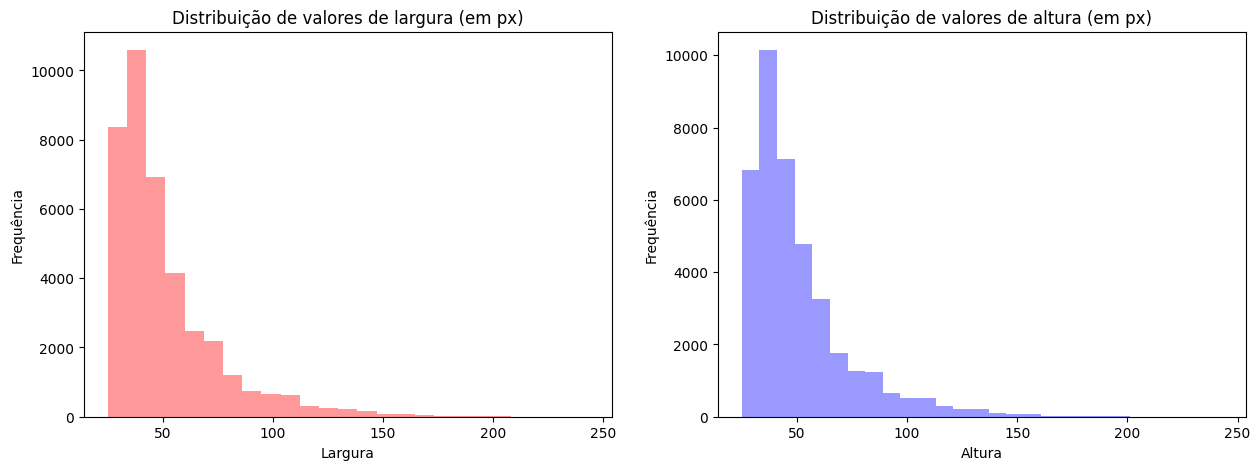

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

sns.distplot(
    GTSRB.Width,
    bins=25,
    kde=False,
    color='red',
    ax=axs[0],
)
axs[0].set_title("Distribuição de valores de largura (em px)")
axs[0].set_xlabel("Largura")
axs[0].set_ylabel("Frequência")

sns.distplot(
    GTSRB.Height,
    bins=25,
    kde=False,
    color='blue',
    ax=axs[1]
)
axs[1].set_title("Distribuição de valores de altura (em px)")
axs[1].set_xlabel("Altura")
axs[1].set_ylabel("Frequência")

plt.show()

In [13]:
H_efet = (GTSRB['Roi.Y2'] - GTSRB['Roi.Y1']).abs()
W_efet = (GTSRB['Roi.X2'] - GTSRB['Roi.X1']).abs()

W_efet.name = 'Largura efetiva'
H_efet.name = 'Altura efetiva'

pd.concat([W_efet, H_efet], axis=1, names=['a', 'b']).describe()

Largura efetiva  Altura efetiva
count     39209.000000    39209.000000
mean         39.197786       38.765998
std          21.821369       20.828697
min          15.000000       15.000000
25%          24.000000       24.000000
50%          33.000000       32.000000
75%          47.000000       47.000000
max         203.000000      185.000000

<ipython-input-14-4780f5778780>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
<ipython-input-14-4780f5778780>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


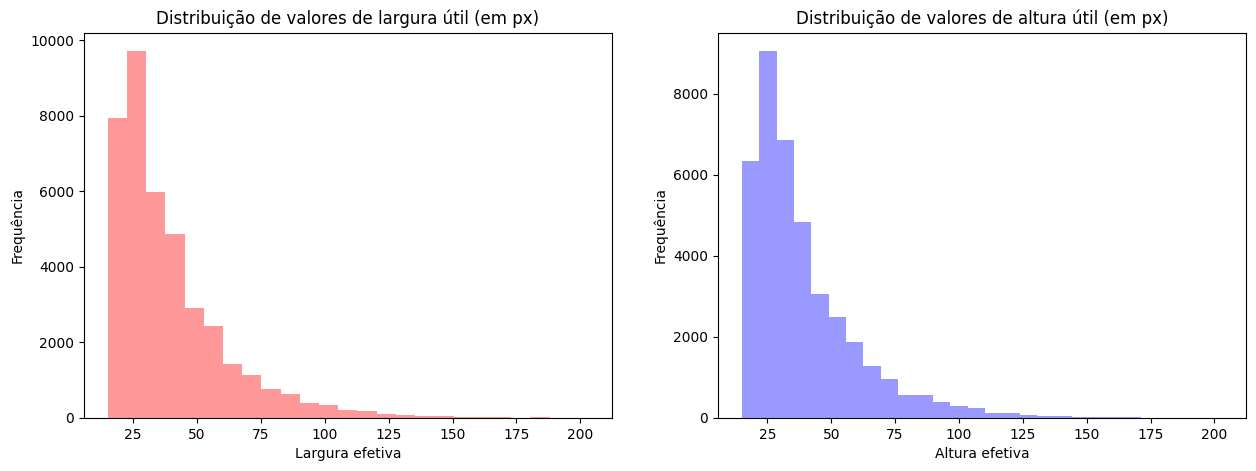

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

sns.distplot(
    W_efet,
    bins=25,
    kde=False,
    color='red',
    ax=axs[0]
)
axs[0].set_title("Distribuição de valores de largura útil (em px)")
axs[0].set_ylabel("Frequência")

sns.distplot(
    H_efet,
    bins=25,
    kde=False,
    color='blue',
    ax=axs[1]
)
axs[1].set_title("Distribuição de valores de altura útil (em px)")
axs[1].set_ylabel("Frequência")

plt.show()

# Informações sobre as placas disponíveis


Outra informação relevante se dá sobre a quantidade de dados disponíveis para cada placa:



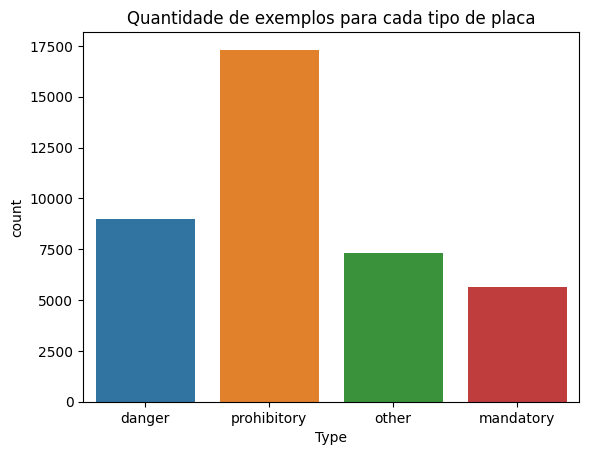

In [15]:
sns.countplot(
    x='Type',
    data=GTSRB,
).set_title("Quantidade de exemplos para cada tipo de placa")

plt.show()

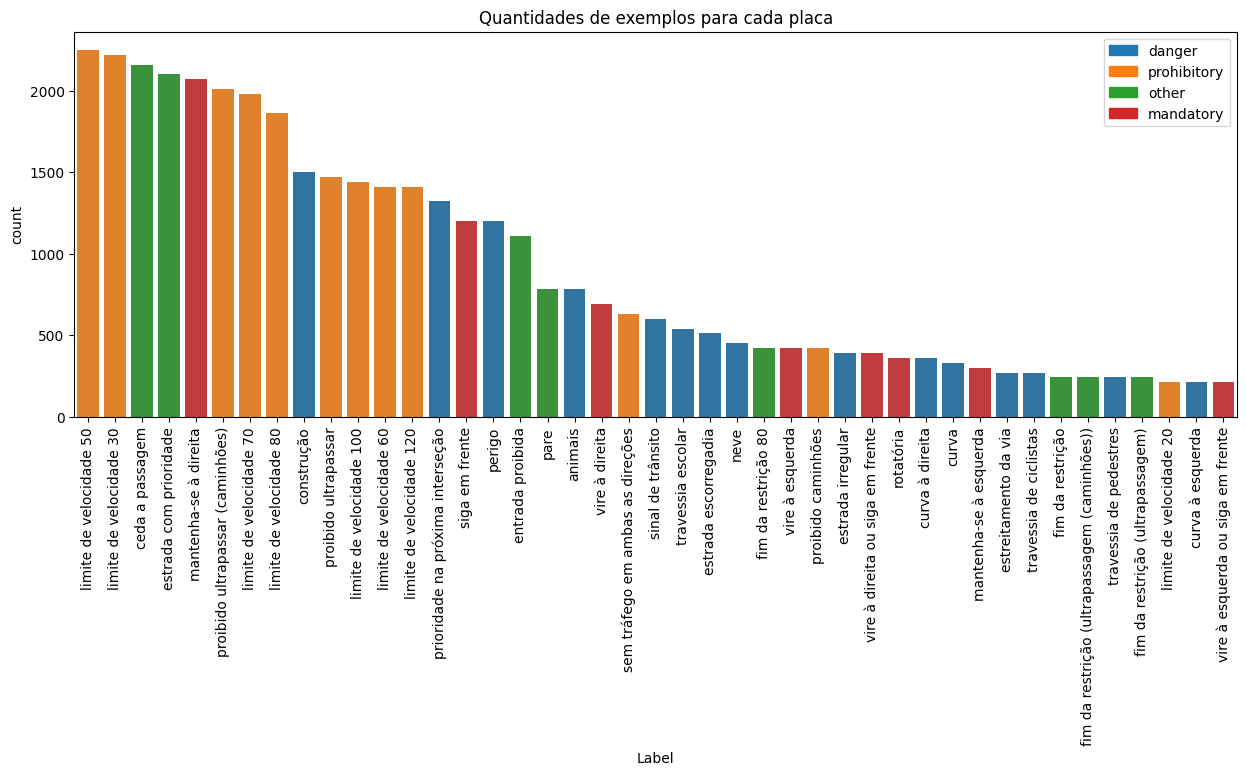

In [16]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)

LabelsType = GTSRBInfo.set_index('Label').loc[Labels].TypeId
palette = np.asarray(sns.color_palette())[LabelsType]

sns.countplot(
    x='Label',
    data=GTSRB,
    palette=palette,
    order=Labels,
).set_title("Quantidades de exemplos para cada placa")

plt.legend(handles=[
    mpatches.Patch(color=barColor, label=barType)
    for barColor, barType
    in zip(sns.color_palette(), Types)
])

plt.show()

# Visualização das placas

Vamos agora observar um exemplo de cada placa presente no dataset.



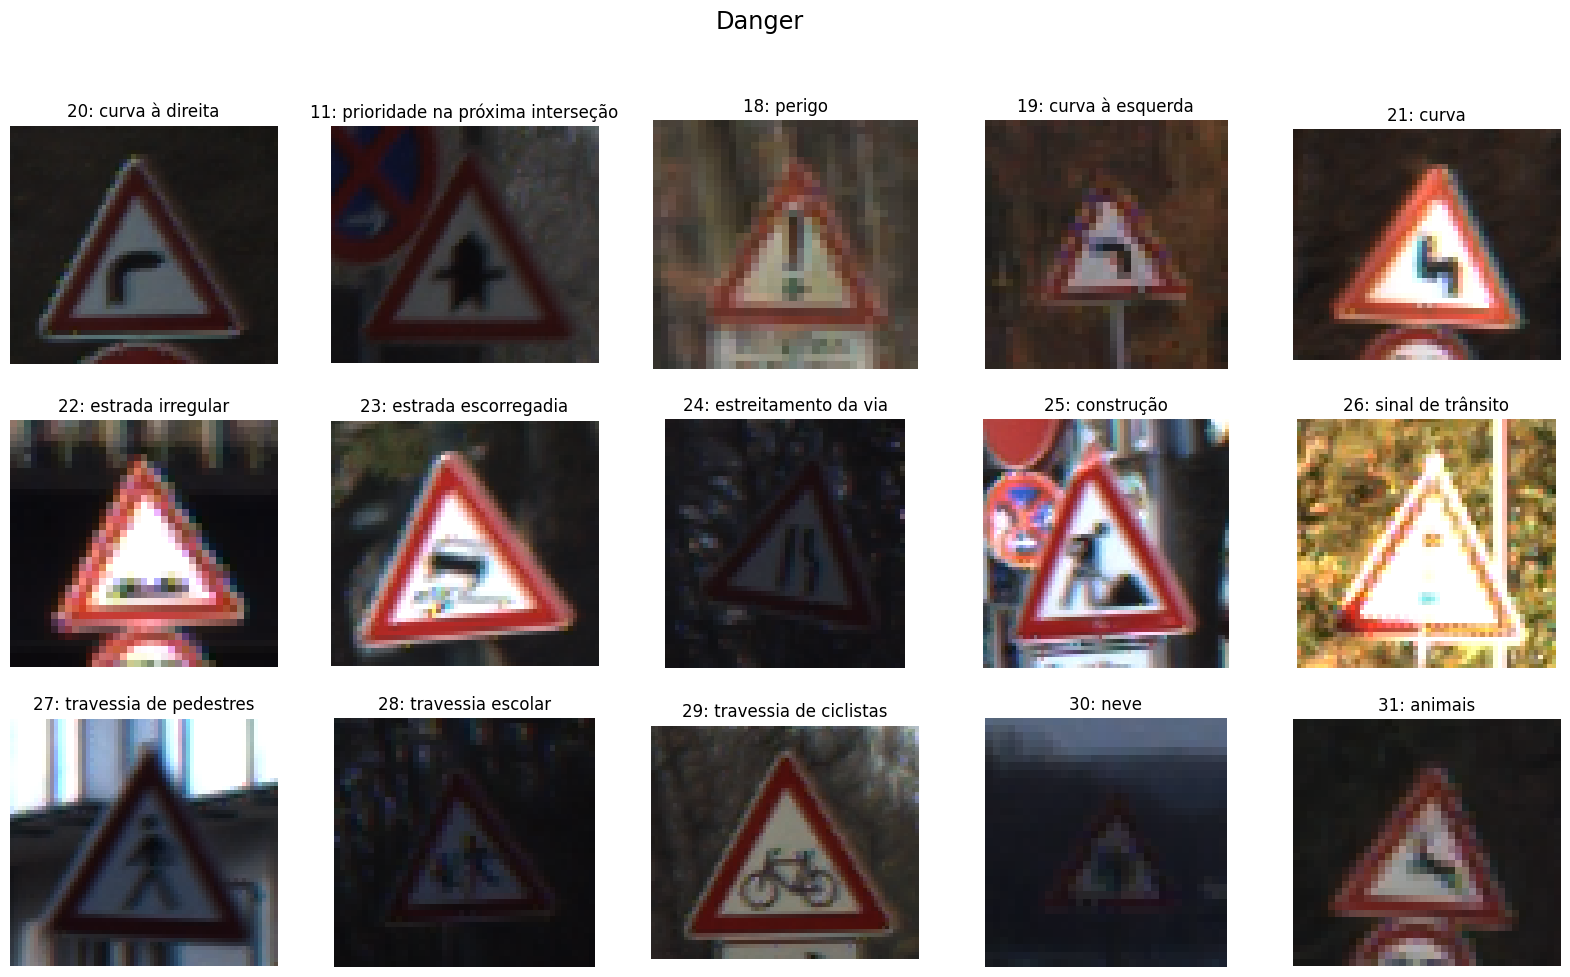

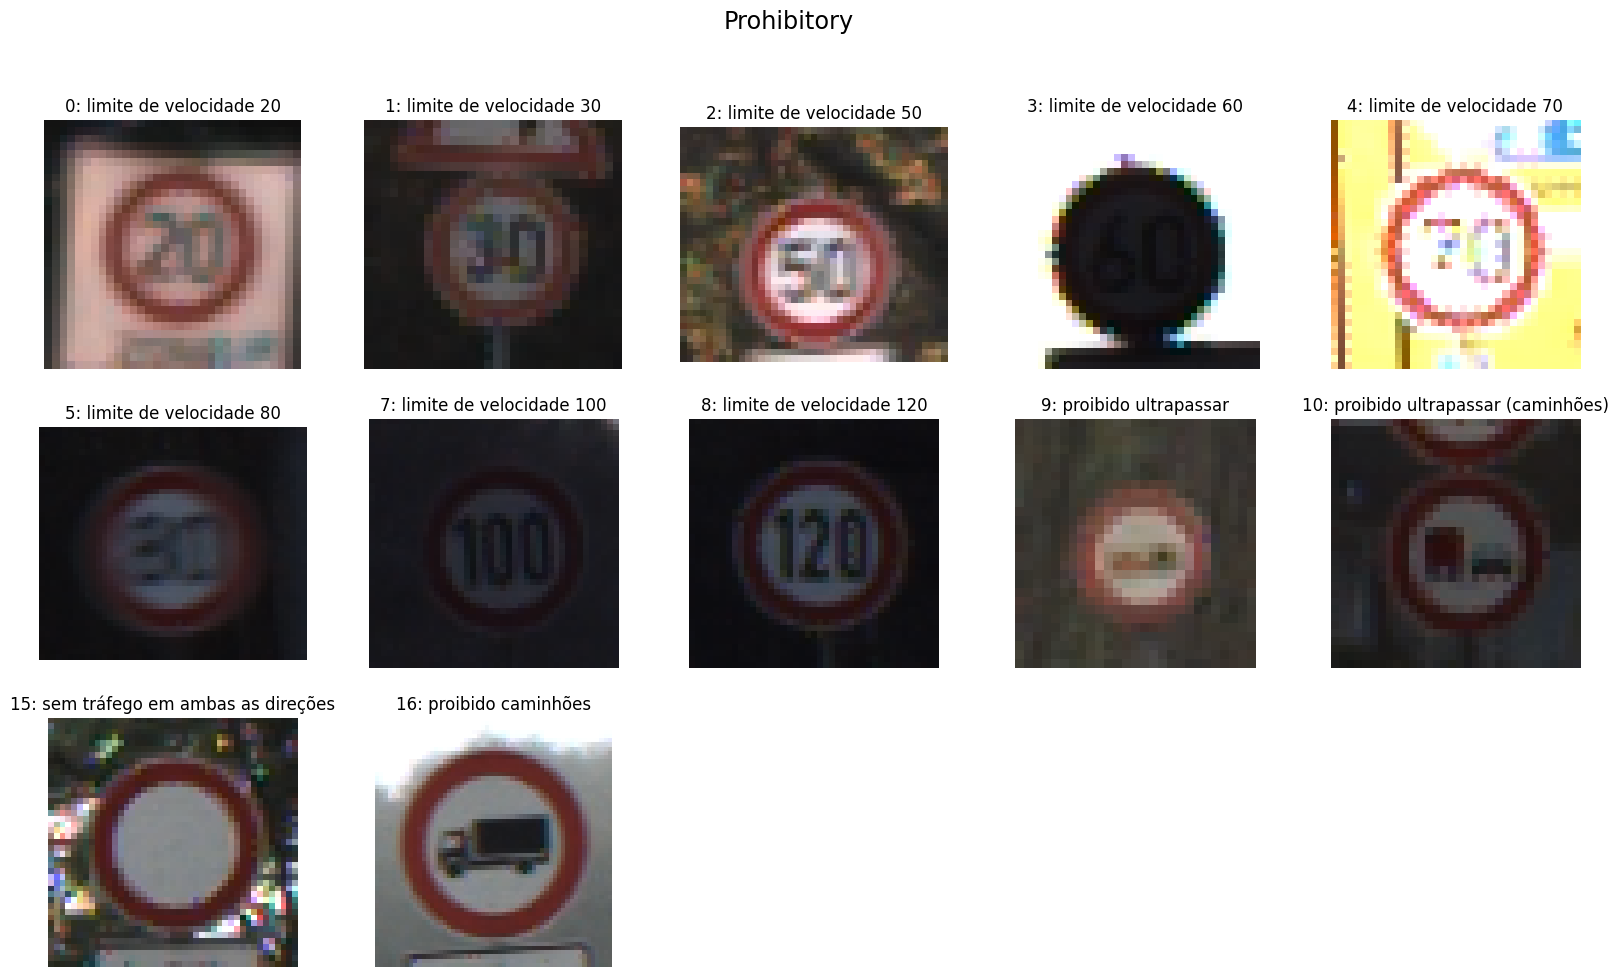

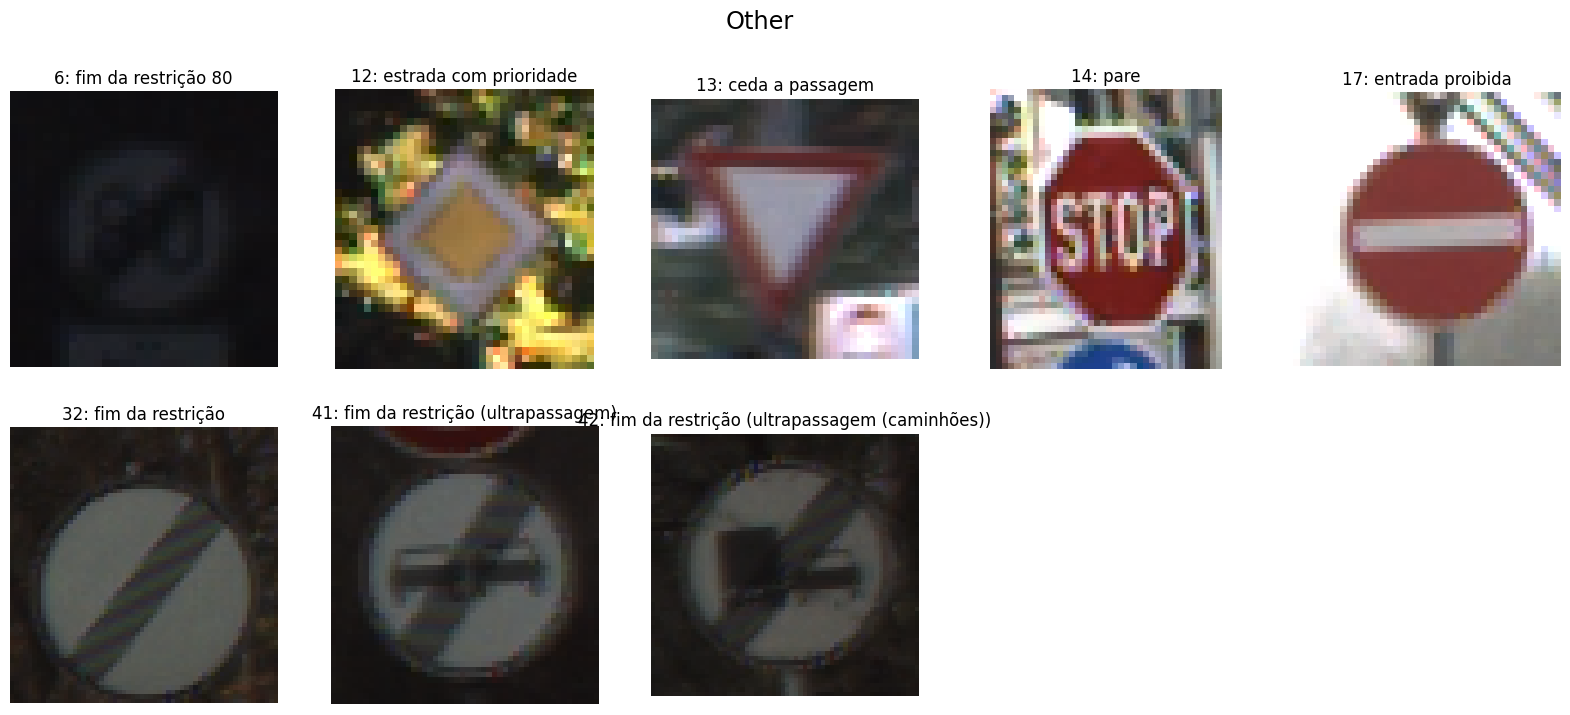

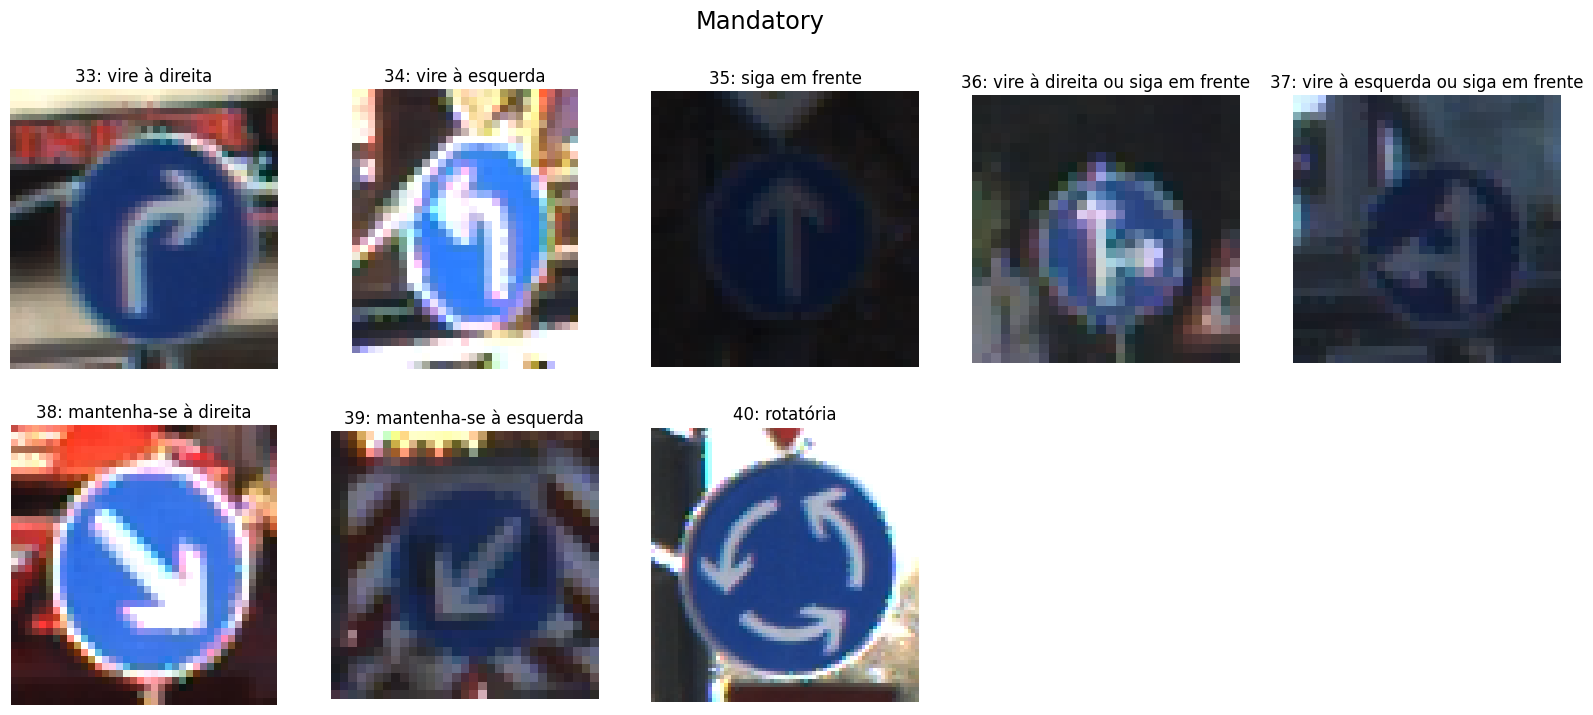

In [19]:
plotTrafficSigns(GTSRB, random_state=random_state)

# Tratamento de Dados

Agora que já pudemos observar os dados disponíveis, faremos alguns tratamentos para possibilitar o uso das imagens pelo modelo e para obtermos melhores resultados.

# Data Augmentation


Como nossos conjunto de dados não possui tantas imagens, uma prática recomendada nos próprios exemplos do keras é a de usar a técnica de data augmentation. Através dela, podemos gerar novas imagens a partir das imagens presentes no dataset através da aplicação de pequenas transformações, como por exemplos pequenas rotações ou translações da imagem original, conforme definiremos abaixo

In [20]:
dataAugmentation = {
    'rotation_range': 10,
    'zoom_range': 0.15,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'shear_range': 0.15,
}

imageGenerator = ImageDataGenerator(**dataAugmentation)

# Tratamento e leitura das imagens

Neste item definiremos uma série de tratamentos sobre cada imagem que será carregada, para que elas possam ser corretamente mapeadas para as entradas da rede neural e para que os resultados do modelo sejam melhores. Os tratamentos feitos serão:

1. Redimensionar imagens para um mesmo tamanho
O objetivo aqui é que todas as imagens tenham o mesmo número de valores para que eles possam ser mapeados na entrada da rede neural.

2. Normalizar o contraste nas figuras
O objetivo é tornar os detalhes das placas mais nítidos e mais distintos de elementos de fundo.

3. A região de interesse, onde de fato a placa se encontra, não necessariamente equivale a toda a área da imagem. (TODO)1

In [23]:
imageShape = {
    'height': 32,
    'width': 32,
    'depth': 3,
}

from tqdm.notebook import tqdm  # Barra de progresso

def process_images_in_batches(paths, batch_size=100):
    processed_images = []
    for i in tqdm(range(0, len(paths), batch_size)):
        batch_paths = paths[i:i+batch_size]
        batch_images = [plt.imread(path) for path in batch_paths]
        batch_processed = [imageTreatment(image) for image in batch_images]
        processed_images.extend(batch_processed)
    return processed_images

In [24]:
%%time

Images = process_images_in_batches(GTSRB.Path)

  0%|          | 0/393 [00:00<?, ?it/s]

CPU times: user 5min 5s, sys: 11 s, total: 5min 16s
Wall time: 2h 18min 6s


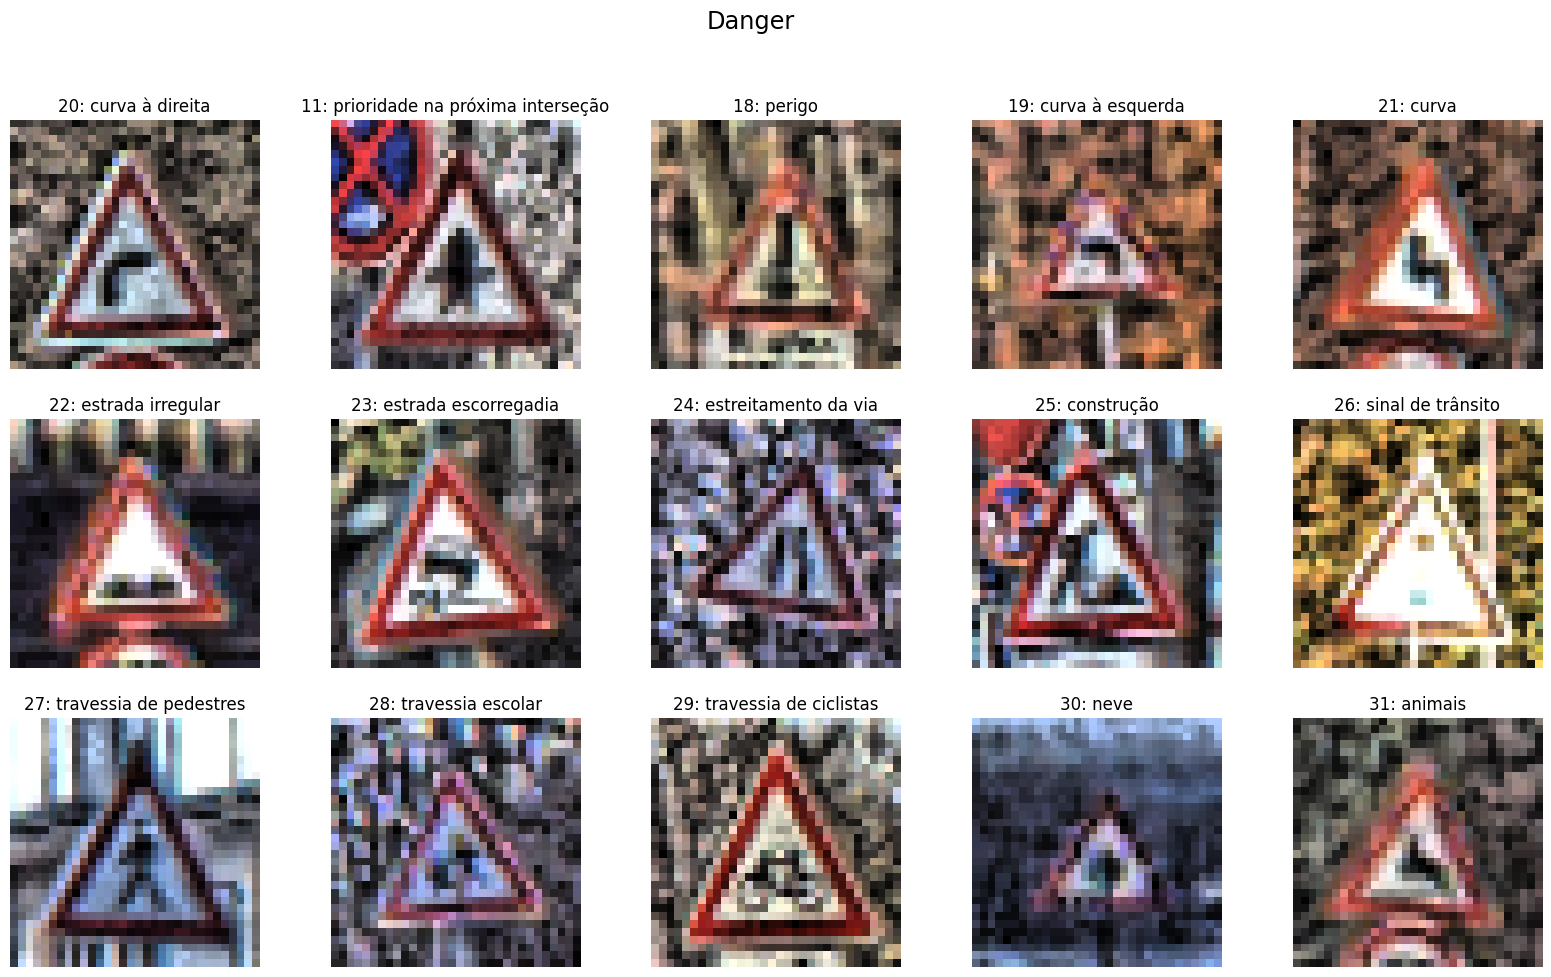

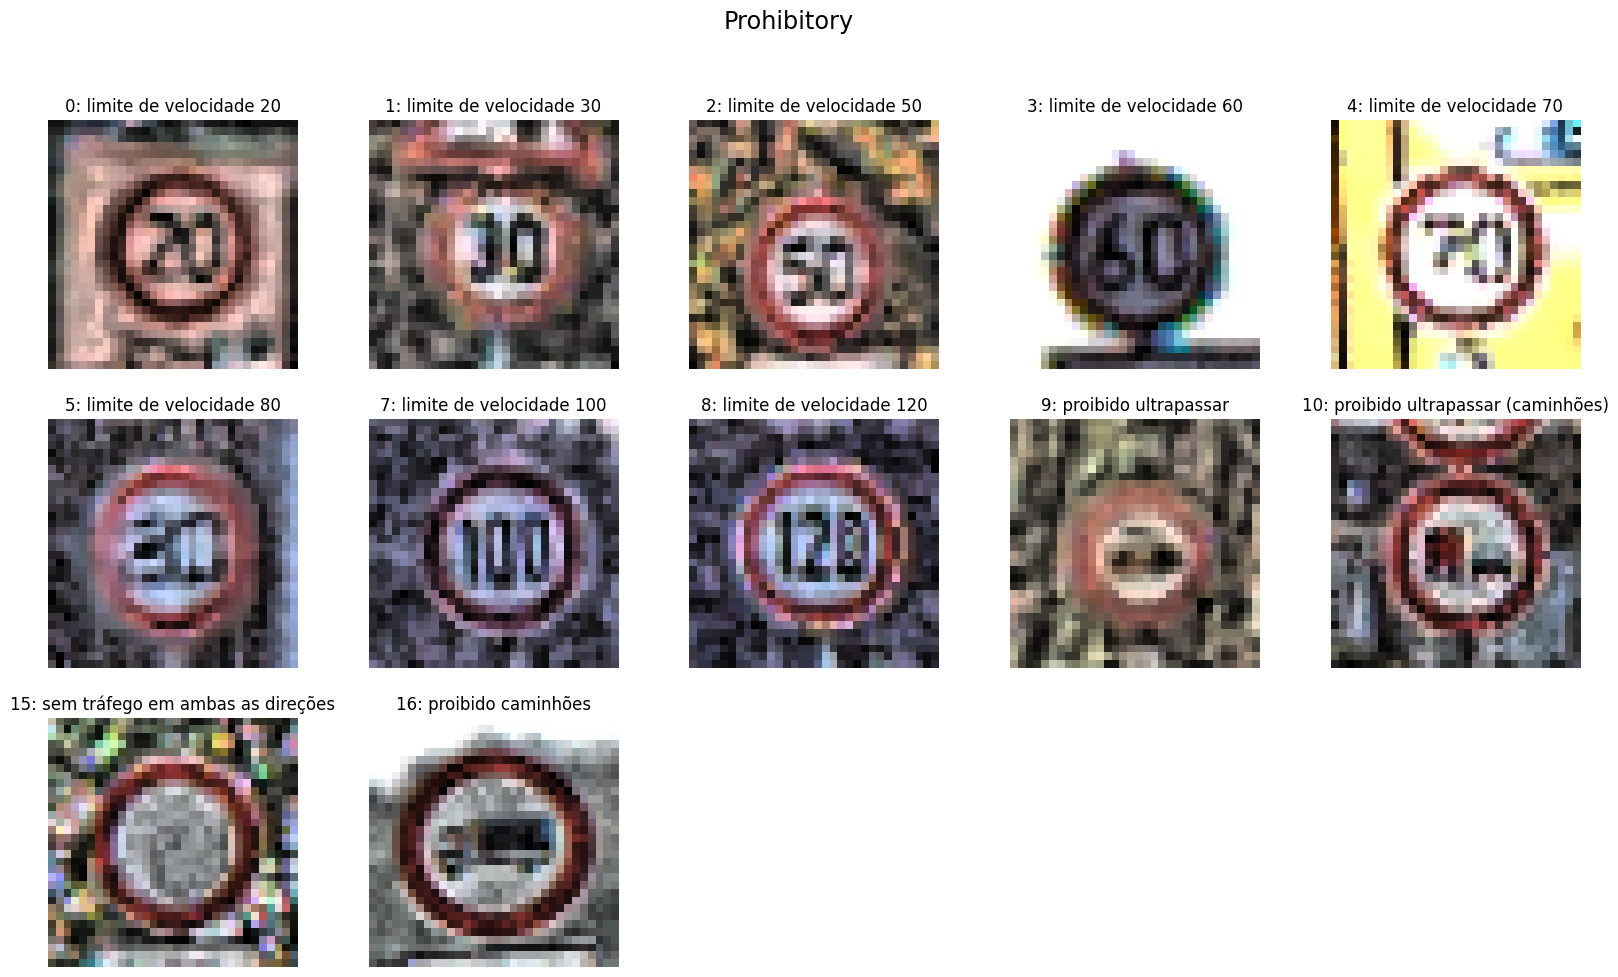

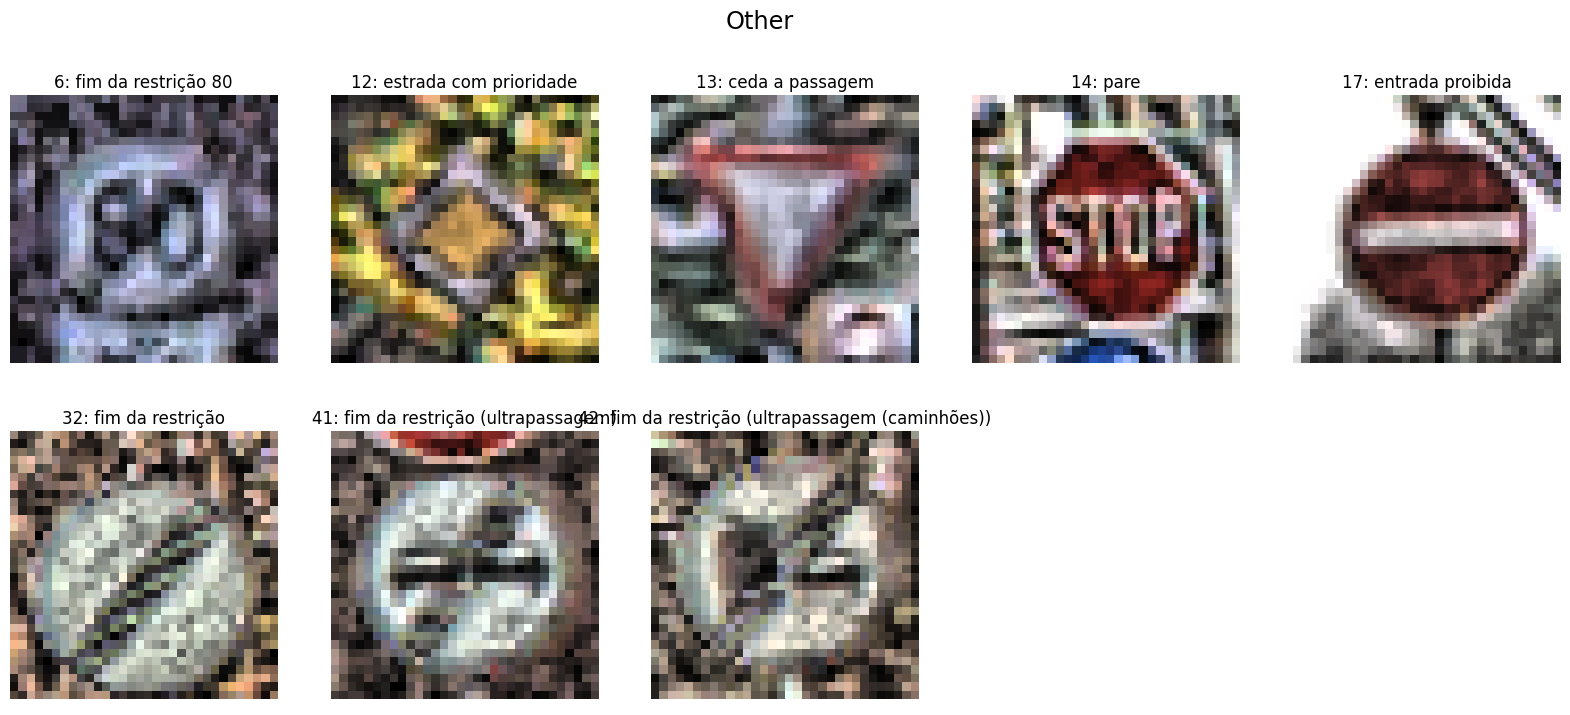

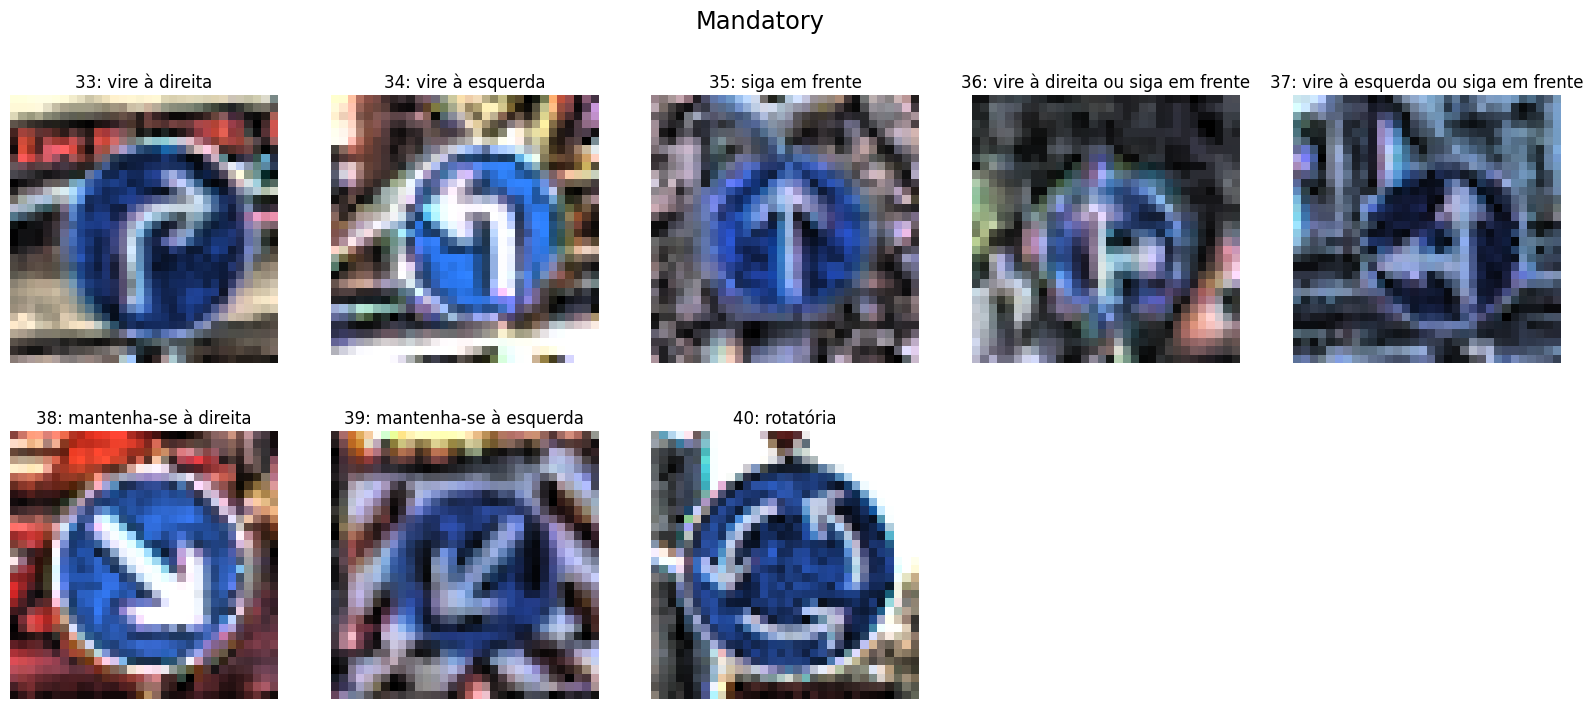

In [25]:
plotTrafficSigns(GTSRB, imRead=lambda classe: Images[classe.name], random_state=random_state)


# Codificação das classes de saída

Nesta etapa faremos um procedimento adicional para que os dados possam ser utilizados pelo nosso modelo de rede neural:

1. Aplicação de One-Hot Encoding nos valores de Label, usados como saída do modelo Este tratamento é necessário pois a rede neural só é capaz de fornecer resultados de ponto flutuante em um pequeno intervalo e estes valores estão associados à intensidade da ativação de um determinado neurônio. Assim, uma maneira de obter um resultado melhor é utilizando a técnica de One-Hot Encoding e realizar a classificação com base no neurônio de saída que ficou ativo com maior intensidade.

In [26]:
oneHotLabels = pd.get_dummies(GTSRB.Label)

# Divisão em dados de treinamento e de validação


Ainda antes de iniciarmos o treinamento, vamos dividir o dataset em um conjunto de dados especifiamente para treinamento e outro conjunto de dados para validação dos resultados. Assim, poderemos observar a qualidade do classificador com base em métricas de interesse e com dados que não foram utilizados anteriormente.

In [27]:
X_train, X_val, y_train, y_val = train_test_split(
    np.stack(Images),
    oneHotLabels,
    test_size=0.10,
    random_state=random_state
)

print("Dados de treinamento: {:5d}/{}".format(len(X_train), len(GTSRB)))
print("Dados de validação:   {:5d}/{}".format(len(X_val), len(GTSRB)))

Dados de treinamento: 35288/39209
Dados de validação:    3921/39209


# **Treinamento - Classificação**


Agora que já temos todos os dados carregadores e que já observamos as informações que temos disponíveis, vamos iniciar o treinamento de um modelo para a classificação de placas de trânsito, ou seja, dada uma imagem de uma placa, o modelo deve nos fornecer o correto valor de ClassId.

## Definição do modelo
Vamos primeiramente criar um modelo baseado em **Redes Neurais** utilizando o Keras. Nesta etapa será criada a Rede Neural e definiremos quais serão as camadas desta rede.

In [28]:
nClasses = Labels.size
inputShape = (imageShape['height'], imageShape['width'], imageShape['depth'])

TrafficSignNet = Sequential()

# Primeira camada: Convolucional -> BatchNormalization -> MaxPooling
TrafficSignNet.add(Conv2D(8, (5, 5), padding="same", input_shape=inputShape))
TrafficSignNet.add(Activation("relu"))
TrafficSignNet.add(BatchNormalization(axis=-1))
TrafficSignNet.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda camada: Convolucional -> Relu -> BatchNormalization -> Convolucional -> Relu -> BatchNormalization -> MaxPooling
TrafficSignNet.add(Conv2D(16, (3, 3), padding="same"))
TrafficSignNet.add(Activation("relu"))
TrafficSignNet.add(BatchNormalization(axis=-1))
TrafficSignNet.add(Conv2D(16, (3, 3), padding="same"))
TrafficSignNet.add(Activation("relu"))
TrafficSignNet.add(BatchNormalization(axis=-1))
TrafficSignNet.add(MaxPooling2D(pool_size=(2, 2)))

# Terceira camada: Convolucional -> Relu -> BatchNormalization -> Convolucional -> Relu -> BatchNormalization -> MaxPooling
TrafficSignNet.add(Conv2D(32, (3, 3), padding="same"))
TrafficSignNet.add(Activation("relu"))
TrafficSignNet.add(BatchNormalization(axis=-1))
TrafficSignNet.add(Conv2D(32, (3, 3), padding="same"))
TrafficSignNet.add(Activation("relu"))
TrafficSignNet.add(BatchNormalization(axis=-1))
TrafficSignNet.add(MaxPooling2D(pool_size=(2, 2)))

# Quarta camada: Flatten -> Relu -> BatchNormalization -> DropOut
TrafficSignNet.add(Flatten())
TrafficSignNet.add(Dense(128))
TrafficSignNet.add(Activation("relu"))
TrafficSignNet.add(BatchNormalization())
TrafficSignNet.add(Dropout(0.5))

# Quinta camada: Flatten -> Relu -> BatchNormalization -> DropOut
TrafficSignNet.add(Flatten())
TrafficSignNet.add(Dense(128))
TrafficSignNet.add(Activation("relu"))
TrafficSignNet.add(BatchNormalization())
TrafficSignNet.add(Dropout(0.5))

# Sexta camada: Softmax
TrafficSignNet.add(Dense(nClasses))
TrafficSignNet.add(Activation("softmax"))

Por fim, vamos definir os pesos de acordo com o número de elementos de cada classe. Esta abordagem é usada por conta do desbalanceamento no número de imagens disponíveis para cada classe no dataset.

In [29]:
classTotals = y_train.sum(axis=0)
classWeights = classTotals.max() / classTotals

classWeight = {
    i: classWeight
    for i, classWeight in enumerate(classWeights)
}

## Treinamento do modelo
Com o modelo definido, vamos agora compilá-lo e vamos também adicionar o optimizador Adam.

Depois disso, vamos treinar este modelo com base nos dados de treinamento que temos disponíveis.

In [31]:
numEpochs = 30
learningRate = 1e-3

from tensorflow.keras.optimizers.legacy import Adam


TrafficSignNet.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(lr=learningRate, decay=(learningRate/(0.5 * numEpochs))),
    metrics=["accuracy"]
)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [35]:
%%time

batchSize = 64

H = TrafficSignNet.fit(
    imageGenerator.flow(X_train, y_train, batch_size=batchSize),
    validation_data=(X_val, y_val),
    steps_per_epoch=(len(X_train) // batchSize),
    epochs=numEpochs,
    class_weight=classWeight,
    verbose=True
)

Epoch 1/30
551/551 [==============================] - 101s 182ms/step - loss: 0.2743 - accuracy: 0.9559 - val_loss: 0.0952 - val_accuracy: 0.9704
Epoch 2/30
551/551 [==============================] - 97s 176ms/step - loss: 0.2573 - accuracy: 0.9577 - val_loss: 0.0579 - val_accuracy: 0.9837
Epoch 3/30
551/551 [==============================] - 95s 171ms/step - loss: 0.2381 - accuracy: 0.9619 - val_loss: 0.0603 - val_accuracy: 0.9799
Epoch 4/30
551/551 [==============================] - 91s 166ms/step - loss: 0.2535 - accuracy: 0.9609 - val_loss: 0.1028 - val_accuracy: 0.9704
Epoch 5/30
551/551 [==============================] - 95s 172ms/step - loss: 0.2444 - accuracy: 0.9605 - val_loss: 0.0514 - val_accuracy: 0.9837
Epoch 6/30
551/551 [==============================] - 90s 164ms/step - loss: 0.2279 - accuracy: 0.9635 - val_loss: 0.1074 - val_accuracy: 0.9702
Epoch 7/30
551/551 [==============================] - 90s 163ms/step - loss: 0.2301 - accuracy: 0.9629 - val_loss: 0.0573 - val_a

# Salvar o modelo inteiro em um arquivo HDF5

In [36]:
from tensorflow.keras.models import load_model
TrafficSignNet.save('/content/drive/My Drive/0-Dataset/SafeRoute/TrafficSignNet.h5')
TrafficSignNet.save('/content/drive/My Drive/0-Dataset/SafeRoute/TrafficSignNet.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Acuracia ao longo do Treinamento

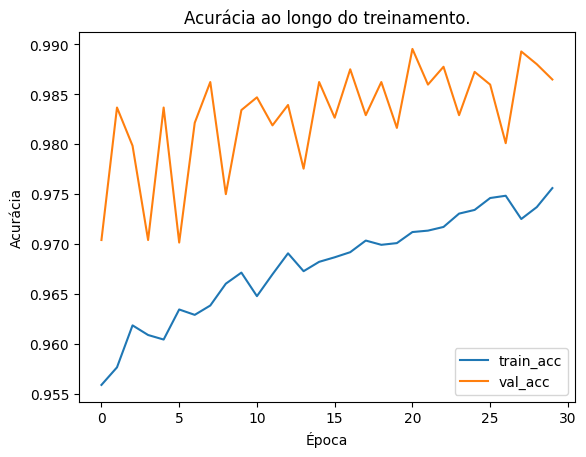

In [37]:
plt.plot(np.arange(numEpochs), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(numEpochs), H.history['val_accuracy'], label='val_acc')
plt.title("Acurácia ao longo do treinamento.")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend(loc="lower right")
plt.show()

# Desempenho do modelo

Vamos primeiramente observar o desempenho do modelo com base nos dados de validação.



In [38]:
predictions = TrafficSignNet.predict(X_val, batch_size=batchSize)

report = classification_report(
    np.asarray(y_val).argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=y_val.columns
)

print(report)

62/62 [==============================] - 3s 51ms/step
                                              precision    recall  f1-score   support

                                     animais       1.00      1.00      1.00        80
                             ceda a passagem       1.00      1.00      1.00       229
                                  construção       1.00      0.99      1.00       169
                                       curva       1.00      1.00      1.00        38
                             curva à direita       0.97      1.00      0.99        35
                            curva à esquerda       1.00      1.00      1.00        20
                            entrada proibida       1.00      1.00      1.00       104
                      estrada com prioridade       0.99      1.00      1.00       197
                        estrada escorregadia       1.00      1.00      1.00        63
                           estrada irregular       1.00      1.00      1.00        42

# Resultados para os dados de teste


Por fim, vamos realizar a classificação dos dados de teste e, então, vamos observar a qualidade da classificação feita.



In [39]:
GTSRBTest = pd.read_csv(link + "Test.csv")
GTSRBTest.Path = link + GTSRBTest.Path

# União do dataset e das descrições
GTSRBTest = GTSRBTest.merge(GTSRBInfo, on="ClassId")

GTSRBTest.shape

(12630, 11)

In [40]:
imagesTest = process_images_in_batches(GTSRBTest.Path)

  0%|          | 0/127 [00:00<?, ?it/s]

In [41]:
predictionsTest = TrafficSignNet.predict(np.stack(imagesTest), batch_size=batchSize)
y_test = pd.get_dummies(GTSRBTest.Label)

reportTest = classification_report(
    np.asarray(y_test).argmax(axis=1),
    predictionsTest.argmax(axis=1),
    target_names=y_test.columns
)

print(reportTest)

198/198 [==============================] - 7s 38ms/step
                                              precision    recall  f1-score   support

                                     animais       0.99      0.97      0.98       270
                             ceda a passagem       1.00      1.00      1.00       720
                                  construção       0.95      0.99      0.97       480
                                       curva       0.84      0.80      0.82        90
                             curva à direita       0.82      0.99      0.90        90
                            curva à esquerda       0.85      0.93      0.89        60
                            entrada proibida       1.00      0.98      0.99       360
                      estrada com prioridade       0.99      0.99      0.99       690
                        estrada escorregadia       0.79      1.00      0.88       150
                           estrada irregular       0.95      0.87      0.90       1

## Matriz de confusão


<Axes: >

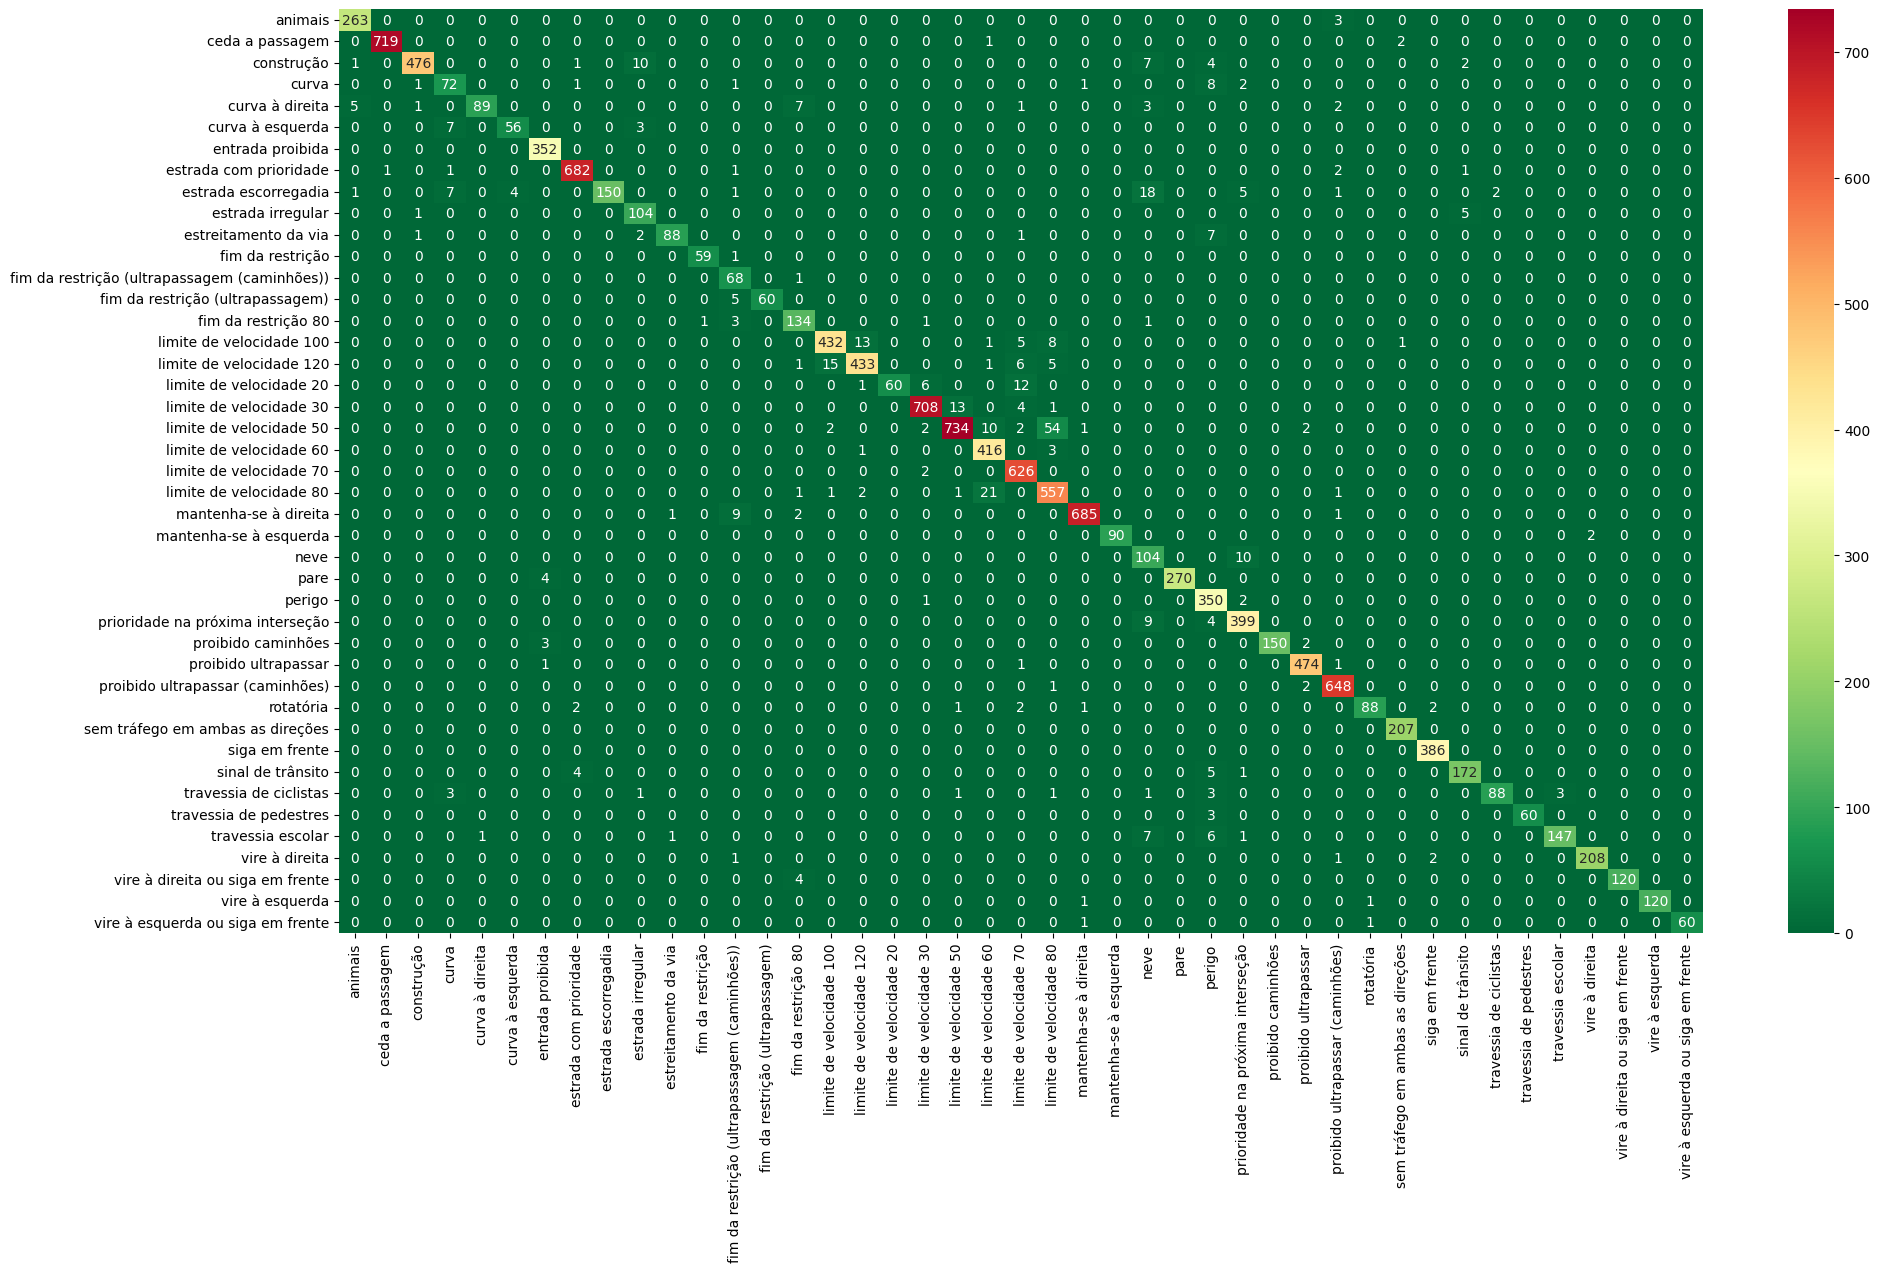

In [42]:
plt.figure(figsize=(22, 12))

sns.heatmap(
    confusion_matrix(predictionsTest.argmax(axis=1), np.asarray(y_test).argmax(axis=1)),
    cmap=plt.cm.RdYlGn_r,
    xticklabels=y_test.columns,
    yticklabels=y_test.columns,
    annot=True,
    fmt='g'
)

## Visualização de classificações incorretas


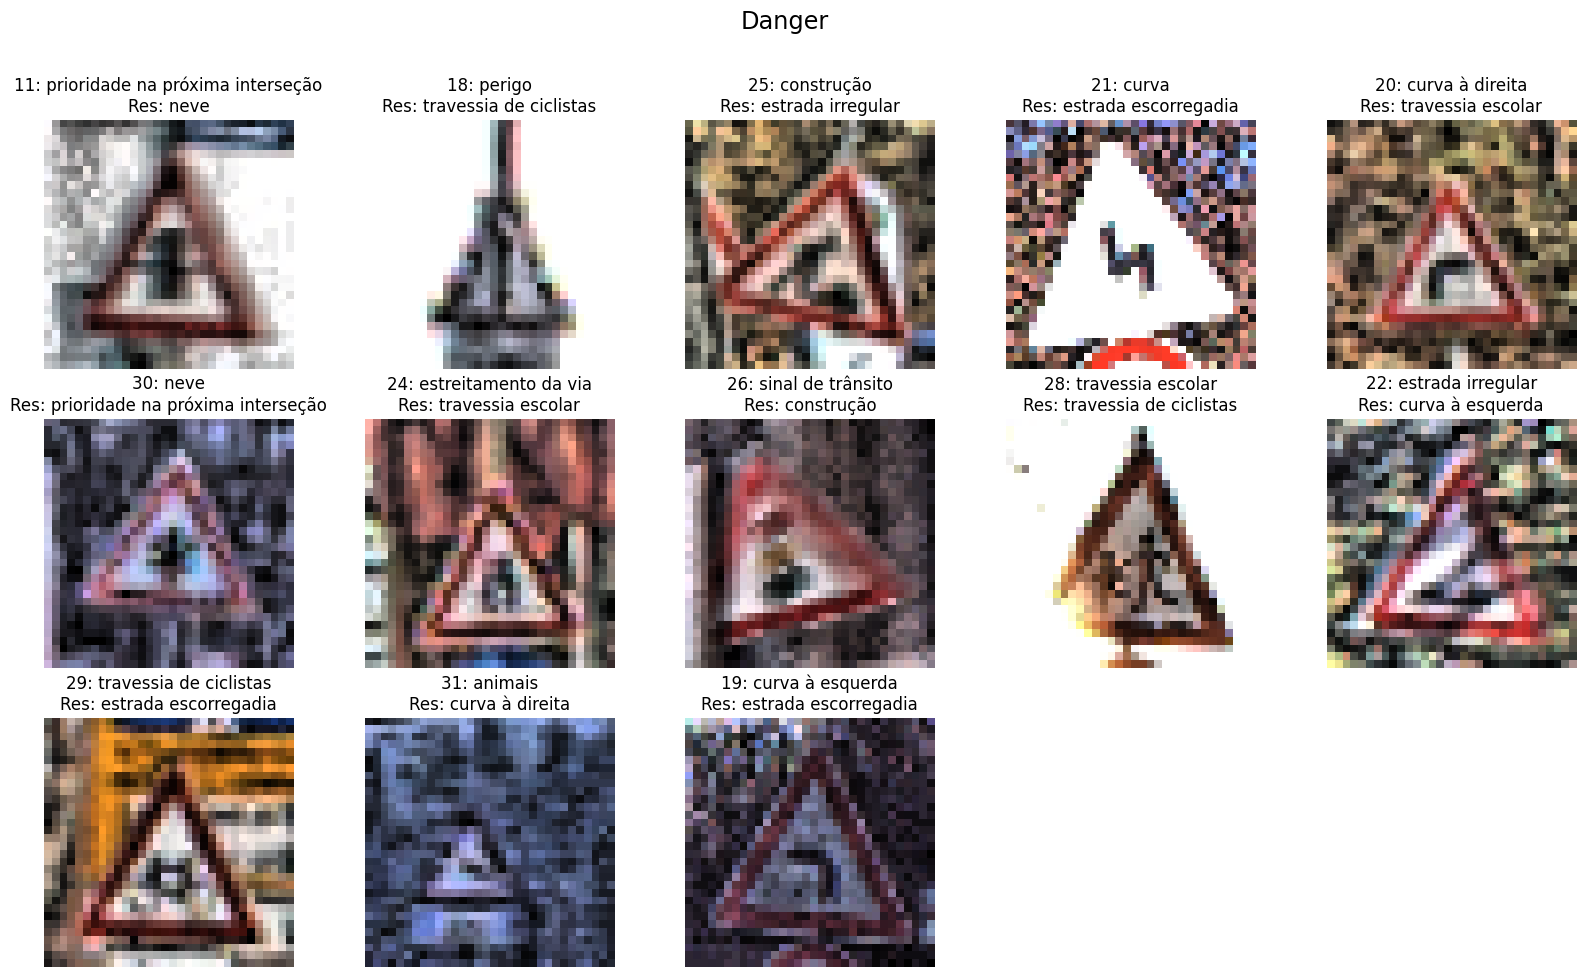

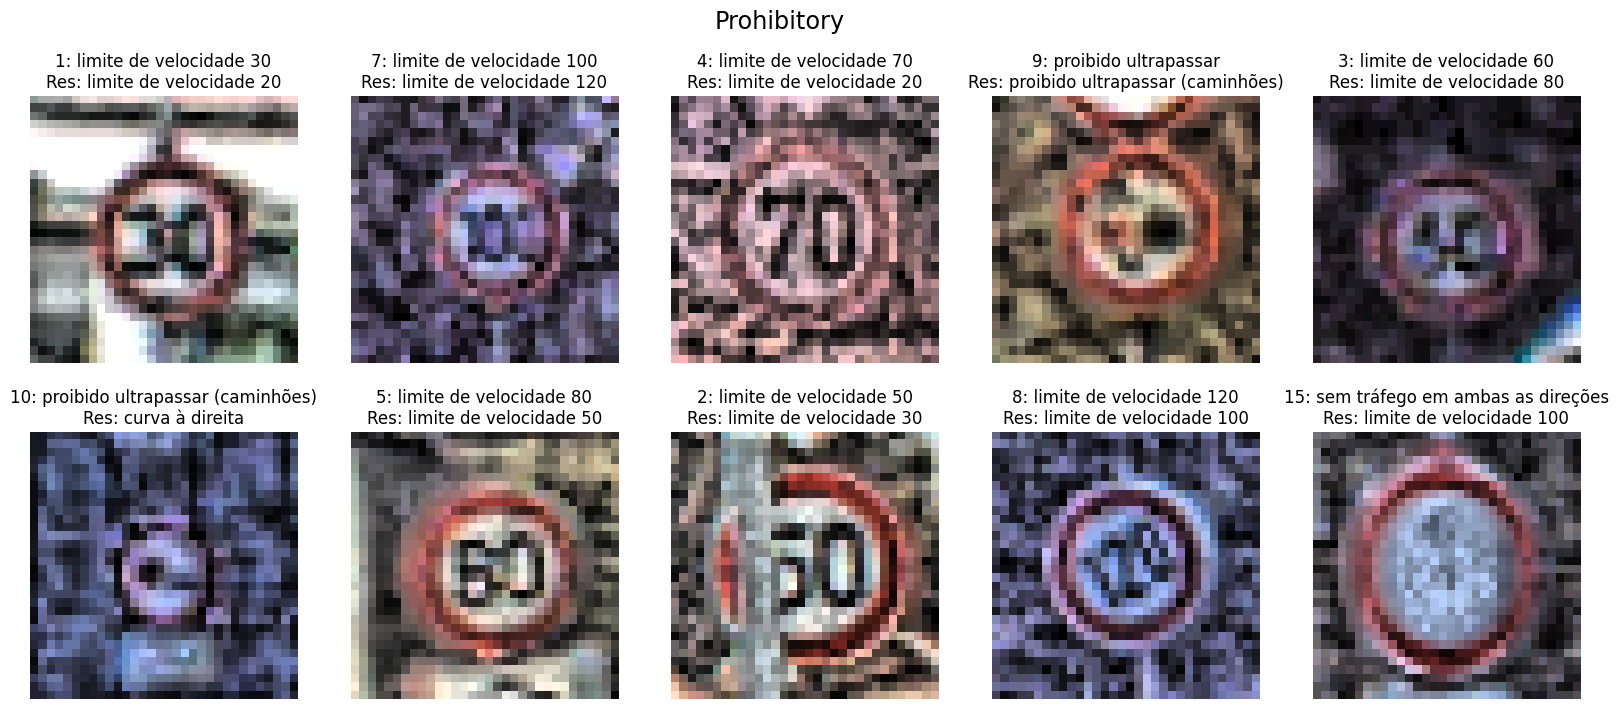

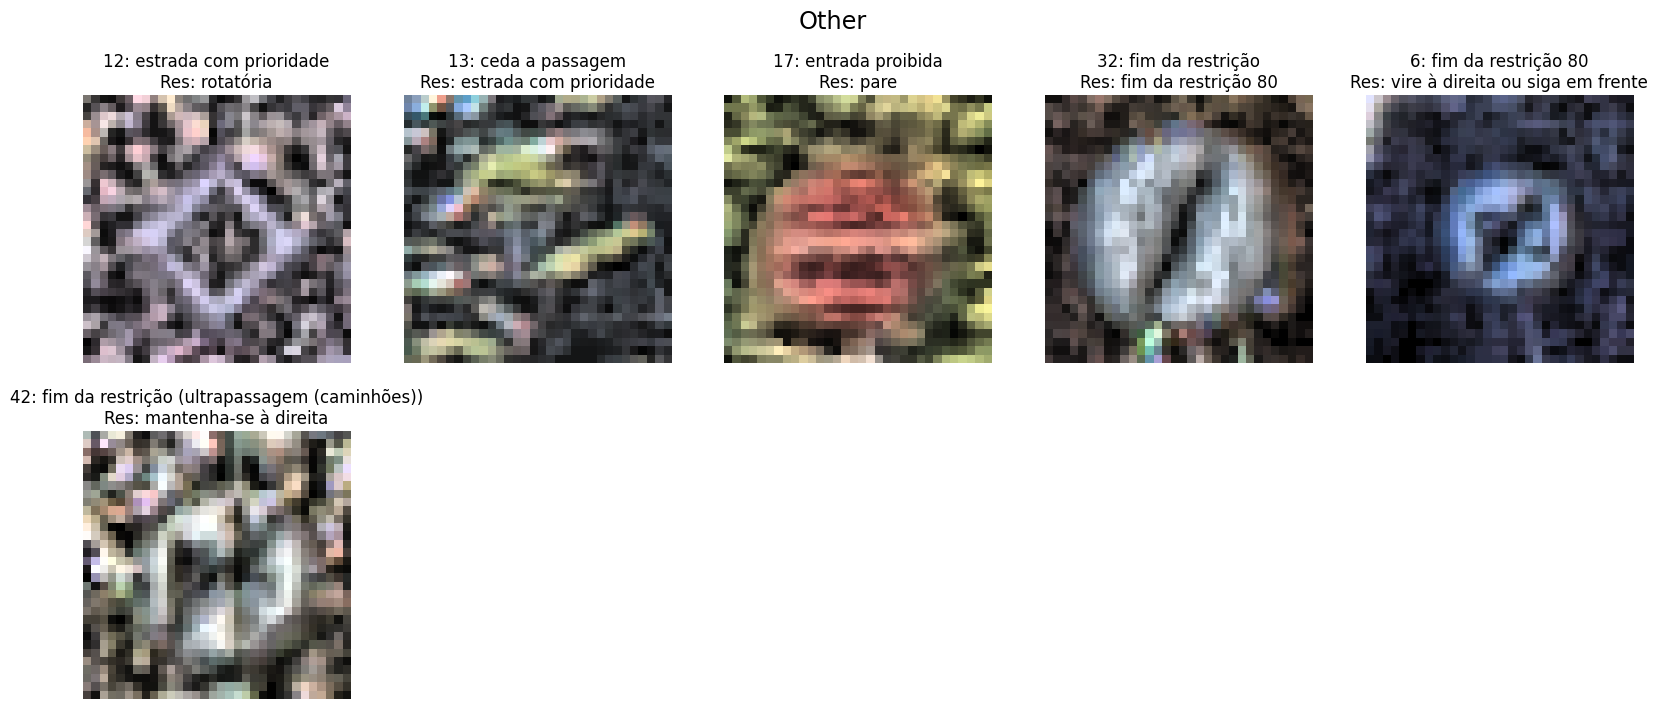

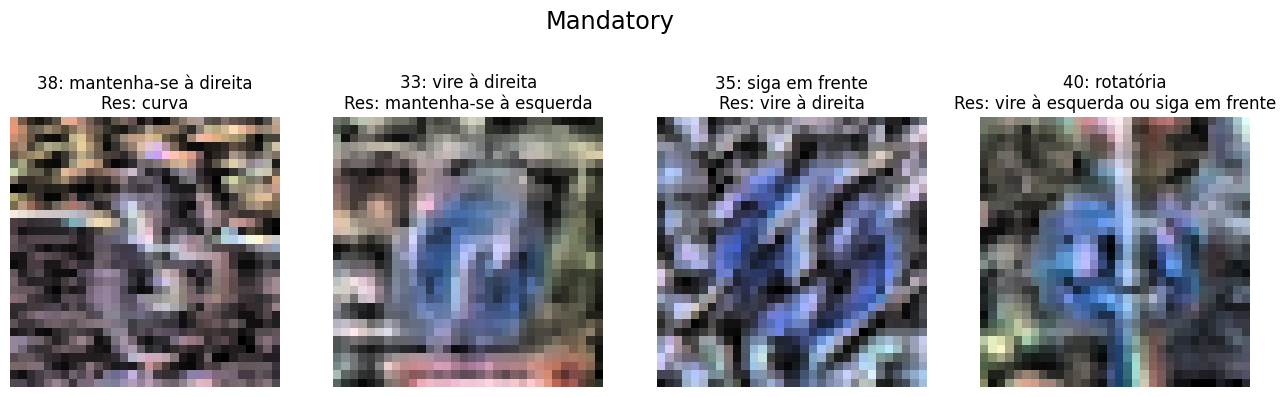

In [43]:
wrongPredicted = GTSRBTest.copy()
wrongPredicted.Label = wrongPredicted.Label.astype(str) + '\n' + "Res: " + y_test.columns[predictionsTest.argmax(axis=1)].astype(str)

plotTrafficSigns(
    wrongPredicted[predictionsTest.argmax(axis=1) != np.asarray(y_test).argmax(axis=1)],
    imRead=lambda classe: imagesTest[classe.name],
    random_state=random_state
)